<a id='main'></a>
[Input Data](#input_data) Folder and filenames for world and simulations from the server

[Figure 1](#fig1) Main & Design

[Figure 2](#fig2) Basic Scenario

[Figure 3](#fig3) Scenarios (Lockdown/ Recover Fraction)

[Figure 4](#fig4) Interactions & Infections

In [ ]:
import os
#from VPM_plotting import *
from VPM_plotting_parallel import *
from virusPropagationModel import *

import VPM_plotting as vpm_plot
import get_status_data_and_plots_from_parallel as plt_para
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from functools import partial

%matplotlib inline
%load_ext autoreload

In [4]:
defaultCmap = cm.get_cmap('Set2')

<a id='input_data'></a>
#### Input DATA from /home/basar/corona_simulations_save/outputs/

In [39]:
#os.listdir('/Volumes/Samsung_T5/corona_simulations/simulation_results_20201028/')

In [38]:
server_data_folder_str = '/Volumes/Samsung_T5/corona_simulations/simulation_results_20201028/'

scenarios_list = ['no_infections',
 'mix_product_0.6',
 'modified_interaction_frequencies_Gangelt',
 'infectivity_scan_0.025_0.500',
 'recover_from_world_scan_0.5_0.9',
 'school_time_separation',
 'no_infections_mix',
 'modified_interaction_frequencies_Bad_Feilnbach',
 'recover_random_scan_0.5_0.9',
 'lockdown_start_scan_100_550',
 'disobedience_scan_0.00_0.45',
 'reopen_all_scan_500_1500',
 'reopen_public_scan_500_1500',
 'reopen_school_scan_500_1500',
 'reopen_work_scan_500_1500',
 'recover_random_scan_0_1',
 'infectivity_scan_0.05_0.50',
 'base_scenario',
 'product_0.6_scan_inf_0.075_1.200',
 'reopen_all_scan_672_1344',
 'close_all_336',
 'recover_schedule_type',
 'recover_ordered1_0.5_0.9',
 'mix_base_scenario']


scenarios_dict = {}
scenarios_dict['Infectivity 0.30'] = 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.300_ri_1_rx_0'
scenarios_dict['Infectivity 0.15'] = 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.150_ri_1_rx_0'
scenarios_dict['Lockdown'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_disobedience_0.000_ri_1_rx_0'
scenarios_dict['Non-compliance'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_disobedience_0.250_ri_1_rx_0'
scenarios_dict['Reopen All'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0'         
scenarios_dict['Reopen School'] =  'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0'      
scenarios_dict['Reopen Work'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0'
scenarios_dict['Reopen Public'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0'
scenarios_dict['Lockdown_onset'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_450.000_ri_1_rx_0'
scenarios_dict['Herd Immunity R'] =  'no_mitigation_IF03_recover_frac_0.500_rw_0_ri_1_rx_0'
scenarios_dict['Herd Immunity W'] =  'no_mitigation_IF03_recover_frac_0.500_rw_1_ri_1_rx_0'
scenarios_dict['Reopen All HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1008.000_ri_1_rx_0'
scenarios_dict['MU 2 HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'
scenarios_dict['MU 8 HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_mu_8.000_ri_1_rx_0'
scenarios_dict['MU 0.5 HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0'
scenarios_dict['MU 0.5 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0'
scenarios_dict['MU 8 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_mu_8.000_ri_1_rx_0'
scenarios_dict['MU 0.5 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0'
scenarios_dict['MU 2 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'

In [44]:
server_data_folder = 'server_data/V2_RPM02_Gangelt/'
filenames = os.listdir(server_data_folder)
filenames

['V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.350_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_recover_frac_0.900_rw_1_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_recover_frac_0.780_rw_0_ri_1_rx_0',
 'IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_800.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_school_IF03_start_3_900.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1300.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_school_IF03_start_3_600.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_1100.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_250.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_

In [43]:
folder='server_data/V2_RPM02_Gangelt/'
prefix = 'V2_RPM02_Gangelt_big_Ifreq_2_'
folders = ['no_mitigation_IF03_infectivity_0.300_ri_1_rx_0',
           'no_mitigation_IF03_infectivity_0.150_ri_1_rx_0',
           'close_all_IF03_disobedience_0.000_ri_1_rx_0',
           'close_all_IF03_disobedience_0.250_ri_1_rx_0',
           'close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0',
           'close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0',           
           'close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0',
           'close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0']
          #'close_all_reopen_school_IF03_start_3_450.000_5reinfections_at_1000',
          #'close_all_reopen_all_IF03_start_3_750_5_reinfections_at_1000']
          

names = ['Infectivity 0.30',
         'Infectivity 0.15',
         'Lockdown',
         'Non-compliance',
         'Reopen All',         
         'Reopen School',       
         'Reopen Work',
         'Reopen Public',]
        #'Reopen School and Reinfection',
        #'Reopen All and Reinfection',]

scenarios = dict(zip(names,[prefix+x for x in folders]))
scenarios['Lockdown_onset'] = 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_450.000_ri_1_rx_0'
scenarios['Herd Immunity R'] =  'no_mitigation_IF03_recover_frac_0.500_rw_0_ri_1_rx_0'
scenarios['Herd Immunity W'] =  'no_mitigation_IF03_recover_frac_0.500_rw_1_ri_1_rx_0'
scenarios['Reopen All HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1008.000_ri_1_rx_0'
scenarios['MU 2 HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'
scenarios['MU 8 HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_mu_8.000_ri_1_rx_0'
scenarios['MU 0.5 HM'] =  'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0'
scenarios['MU 0.5 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0'
scenarios['MU 8 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_mu_8.000_ri_1_rx_0'
scenarios['MU 0.5 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0'
scenarios['MU 2 HM MIX'] =  'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'

In [222]:
scenarios

{'Infectivity 0.30': 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.300_ri_1_rx_0',
 'Infectivity 0.15': 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.150_ri_1_rx_0',
 'Lockdown': 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_disobedience_0.000_ri_1_rx_0',
 'Non-compliance': 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_disobedience_0.250_ri_1_rx_0',
 'Reopen All': 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0',
 'Reopen School': 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0',
 'Reopen Work': 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0',
 'Reopen Public': 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0',
 'Lockdown_onset': 'close_all_IF03_start_2_450.000_ri_1_rx_0',
 'Herd Immunity R': 'no_mitigation_IF03_recover_frac_0.500_rw_0_ri_1_rx_0',
 'Herd Immunity W': 'no_mitigation_IF03_recover_frac_0.500_rw_1_ri_

In [221]:
os.listdir(folder)

['V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.350_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_recover_frac_0.900_rw_1_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_recover_frac_0.780_rw_0_ri_1_rx_0',
 'IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_800.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_school_IF03_start_3_900.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1300.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_school_IF03_start_3_600.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_1100.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_250.000_ri_1_rx_0',
 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_

In [228]:
print('missing folders',
    [scenarios[x] for x in scenarios if scenarios[x] not in os.listdir(folder)])

missing folders ['no_mitigation_IF03_recover_frac_0.500_rw_0_ri_1_rx_0', 'no_mitigation_IF03_recover_frac_0.500_rw_1_ri_1_rx_0', 'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_mu_8.000_ri_1_rx_0', 'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_mu_8.000_ri_1_rx_0']


<a id='fig1'></a>
### Figure 1 Main & Design
[back to top](#main)

Text(0.5, 1.0, 'schedules & locations')

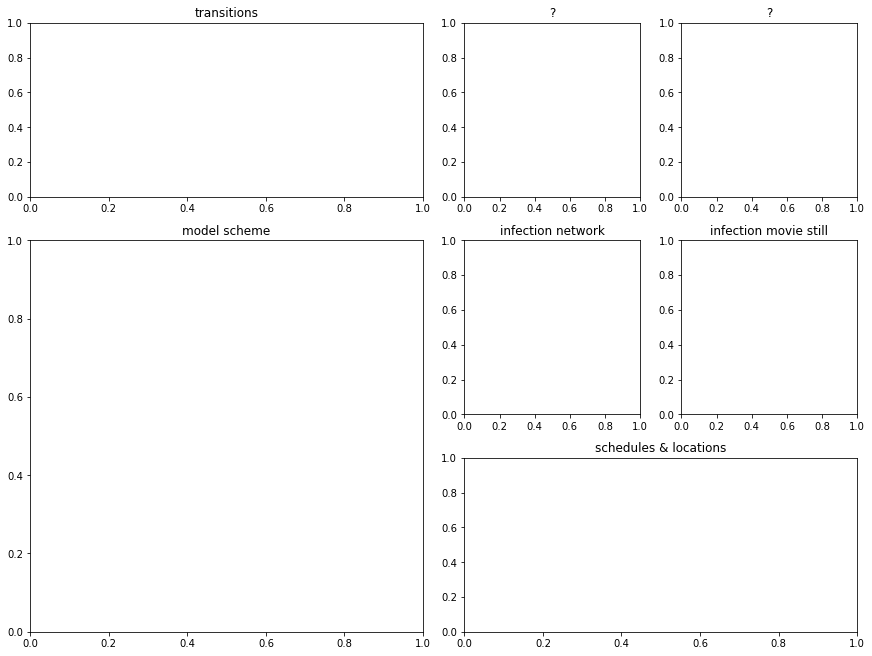

In [4]:
fig1 = plt.figure(constrained_layout=True, figsize=(12,9))
gs = fig1.add_gridspec(3, 4)

f1_ax1 = fig1.add_subplot(gs[0, :2])
f1_ax1.set_title('transitions')

f1_ax2 = fig1.add_subplot(gs[1:3, :2])
f1_ax2.set_title('model scheme')

f1_ax3 = fig1.add_subplot(gs[0,2])
f1_ax3.set_title('?')

f1_ax4 = fig1.add_subplot(gs[0,3])
f1_ax4.set_title('?')

f1_ax5 = fig1.add_subplot(gs[1,2])
f1_ax5.set_title('infection network')

f1_ax6 = fig1.add_subplot(gs[1,3])
f1_ax6.set_title('infection movie still')

#f1_ax7 = fig1.add_subplot(gs[2,2])
#f1_ax7.set_title('infection movie still')

f1_ax8 = fig1.add_subplot(gs[2,2:4])
f1_ax8.set_title('schedules & locations')

<a id='fig2'></a>
### Figure 2 Basic Scenario

In [40]:
scenario = scenarios['MU 2 HM']
scenario

'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'

In [48]:
os.listdir(server_data_folder+scenario)

['sim_parameters.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_contacts.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_Diagnosed.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_IsInfected.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_infection_to_death.csv',
 '.DS_Store',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_encounters.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_schedule_distribution.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_infection_to_recovery.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_hospital_to_icu.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_hospital_to_recovery.csv',
 'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_cumulati

In [206]:
durations = {'I-D'   : ['infection_to_death','infected_to_dead'],
             'I-R'   : ['infection_to_recovery','infected_to_recovered'],
             'H-ICU' : ['hospital_to_icu','hospitalized_to_ICUed'],
             'H-R'   : ['hospital_to_recovery','hospitalized_to_recovered'],
             'I-H'   : ['infection_to_hospital','diagnosed_to_hospital'],
             'H-D'   : ['hospital_to_death','hospitalized_to_dead'],
            }

In [175]:
probs_file = 'datafiles/logicMean_20200828/transition_and_infectivity_pmf_weights.csv'

In [205]:
df_probs.columns

Index(['Unnamed: 0', 'infected_to_diagnosed', 'infected_to_dead',
       'infected_to_recovered', 'diagnosed_to_hospital', 'diagnosed_to_dead',
       'diagnosed_to_recovered', 'hospitalized_to_ICUed',
       'hospitalized_to_dead', 'hospitalized_to_recovered', 'ICUed_to_dead',
       'ICUed_to_recovered', 'infectivity factor'],
      dtype='object')

In [162]:
df_probs = pd.read_csv(probs_file)

In [171]:
probs_scale = df_probs[durations['I-R'][1]]*10**3

0       0.646668
1       0.648740
2       0.650813
3       0.652885
4       0.654958
          ...   
1195    0.019434
1196    0.019258
1197    0.019084
1198    0.018911
1199    0.018740
Name: infected_to_recovered, Length: 1200, dtype: float64

In [ ]:
'transition_and_infectivity_pmf_weights.csv'

In [178]:
def get_duration(server_data_folder,scenario, transition='I-R'):
    df_dur = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-9]+durations[transition][0]+'.csv')
    df_dur.drop('Unnamed: 0', axis=1, inplace=True)
    df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
    return df_dur

(0.0, 10.0)

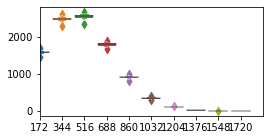

In [112]:
fig,ax = plt.subplots(1,1, figsize=(4,2))
sns.boxenplot(data=df_dur)
ax.set_xlim(0,10)

In [202]:
df_dur

,120,240,360,480,600,720,840,960,1080,1200
0,15,27,27,18,12,12,6,0,0,1
1,12,25,18,23,21,10,1,0,0,0
2,18,24,29,18,13,8,5,0,0,0
3,21,23,24,28,19,9,7,3,1,0
4,14,25,16,19,15,8,7,2,0,0
...,...,...,...,...,...,...,...,...,...,...
95,17,24,24,16,19,7,5,1,0,0
96,10,19,19,21,12,9,1,0,0,0
97,16,18,22,17,12,11,1,1,0,0
98,15,25,28,21,15,8,3,1,2,0


infected_to_dead
infected_to_recovered
hospitalized_to_ICUed
hospitalized_to_recovered
diagnosed_to_hospital
hospitalized_to_dead


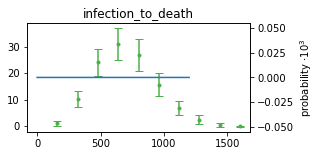

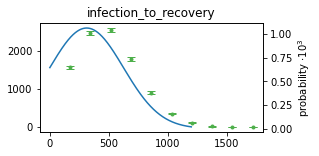

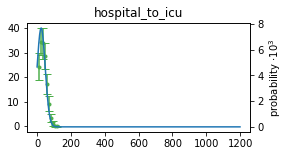

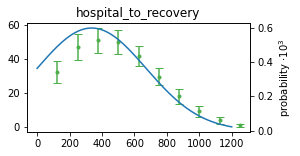

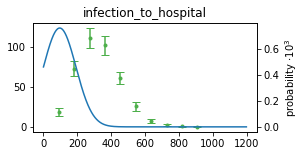

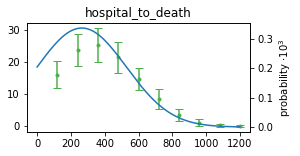

In [207]:
key='I-R'
for key in durations:
    scale = 1000
    fig,ax1 = plt.subplots(1,1, figsize=(4,2))
    df_dur = get_duration(server_data_folder,scenario, transition=key)
    ax2 = ax1.twinx() 
    df_dur_desc = df_dur.describe()
    df_dur_desc.loc['mean'].plot(yerr=df_dur_desc.loc['std'],
                                 capsize=4, fmt = '.',
                                 ax=ax1, color=vpm_plot.statusAndFlagsColors['R'],)

    probs_scale = df_probs[durations[key][1]]*scale
    print(durations[key][1])
    probs_scale.plot(ax=ax2)
    #ax1.set_xlim(0,2000)
    ax1.set_title(durations[key][0])
    ax2.set_ylabel('counts')
    ax2.set_ylabel('probability $\cdot 10^3$')

In [ ]:
dur_list = ['infection_to_recovery', 'infection_to_hospital', 'infection_to_death', 'hospital_to_recovery', 'hospital_to_icu', 'hospital_to_death']
dur_titels = ['Recovery', 'Hospitalization', 'Decease', 'Recovery', 'ICU', 'Decease']

dur_dict = dict(zip(dur_list, dur_titels))
fig, axes = plt.subplots(3,2, figsize=(6,10))

plt.subplots
for k,dur in enumerate(dur_list):
    col = k%3
    row = int(k/3)
    ax=axes[col][row]
    df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur + '.csv')
    df_dur.drop('Unnamed: 0',axis=1, inplace=True)
    df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
    sns.boxplot(data=df_dur, color='gray',ax=ax)#size=2,
    ax.set_xticklabels([x if list(df_dur.columns).index(x)%2==0 else None for x in df_dur.columns])
    ax.set_xlabel('Time [hours]')
    ax.set_ylabel('Counts')
    ax.set_title(dur_dict[dur])
    
plt.tight_layout()
plt.savefig('../fig2/durations.svg')

Text(0.5, 1.0, 'duration 6')

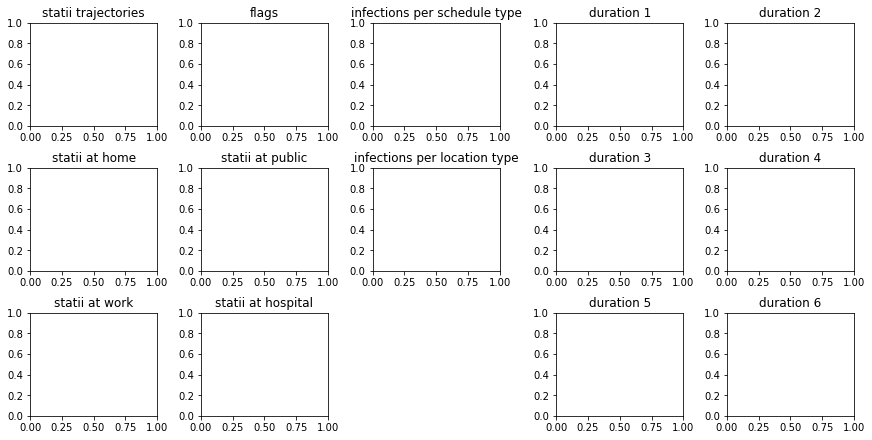

In [5]:
fig2 = plt.figure(constrained_layout=True, figsize=(12,6))
gs = fig2.add_gridspec(3, 5)

f2_ax1 = fig2.add_subplot(gs[0,0])
f2_ax1.set_title('statii trajectories')

f2_ax2 = fig2.add_subplot(gs[0,1])
f2_ax2.set_title('flags')

f2_ax3 = fig2.add_subplot(gs[1,0])
f2_ax3.set_title('statii at home')

f2_ax4 = fig2.add_subplot(gs[1,1])
f2_ax4.set_title('statii at public')

f2_ax5 = fig2.add_subplot(gs[2,0])
f2_ax5.set_title('statii at work')

f2_ax6 = fig2.add_subplot(gs[2,1])
f2_ax6.set_title('statii at hospital')

f1_ax7 = fig2.add_subplot(gs[0,2])
f1_ax7.set_title('infections per schedule type')

f2_ax8 = fig2.add_subplot(gs[1,2])
f2_ax8.set_title('infections per location type')

f1_ax9 = fig2.add_subplot(gs[0,3])
f1_ax9.set_title('duration 1')

f1_ax10 = fig2.add_subplot(gs[0,4])
f1_ax10.set_title('duration 2')

f1_ax11 = fig2.add_subplot(gs[1,3])
f1_ax11.set_title('duration 3')

f1_ax12 = fig2.add_subplot(gs[1,4])
f1_ax12.set_title('duration 4')

f1_ax13 = fig2.add_subplot(gs[2,3])
f1_ax13.set_title('duration 5')

f1_ax14 = fig2.add_subplot(gs[2,4])
f1_ax14.set_title('duration 6')


<a id='fig3'></a>
### Figure 3 Scenarios (Lockdown/ Recover Fraction)
[back to top](#main)

In [210]:
scenarios.keys()

dict_keys(['Infectivity 0.30', 'Infectivity 0.15', 'Lockdown', 'Non-compliance', 'Reopen All', 'Reopen School', 'Reopen Work', 'Reopen Public', 'Lockdown_onset', 'Herd Immunity R', 'Herd Immunity W', 'Reopen All HM', 'MU 2 HM', 'MU 8 HM', 'MU 0.5 HM', 'MU 0.5 HM MIX', 'MU 8 HM MIX', 'MU 2 HM MIX'])

In [5]:
def get_total_infections(data_set_name, scenarios, server_data_folder):
    filename = scenarios[data_set_name][:-10]+'_cumulativ_WasInfected.csv'
    df_I_tot = pd.read_csv(server_data_folder+scenarios[data_set_name] + '/' + filename)
    df_I_tot.drop('time', axis=1, inplace=True)
    df_I_tot.columns = [int(x[11:]) for x in list(df_I_tot.columns)]
    I_tot = df_I_tot.iloc[-1]
    return I_tot

def get_sw_dict(data_set_name, scenarios, server_data_folder, threshold=3000):
    a = get_total_infections(data_set_name, scenarios, server_data_folder)>threshold
    return a.to_dict()

def get_infectivities_at_T(data_set_name, scenarios, server_data_folder, threshold=3000,):
    I_tot = get_total_infections(data_set_name, scenarios, server_data_folder)
    sw_dict = get_sw_dict(data_set_name, scenarios, server_data_folder, threshold=3000)
    inf_t_df_list=[]

    for inf_t in ['infectivities_2', 'infectivities_3']:
        filename = scenarios[data_set_name][:-10]+'_'+inf_t+'_.csv'
        df_infectivities_1 = pd.read_csv(server_data_folder+scenarios[data_set_name] + '/' + filename)
        df_infectivities_1.drop('ID', axis=1, inplace=True)
        df_inf_long = df_infectivities_1.stack().reset_index()
        df_inf_long.columns =['h_ID', 'name', inf_t] 
        df_inf_long['run'] = [int(x[13:]) for x in df_inf_long['name'].values]
        df_inf_long['sw'] = df_inf_long['run'].map(sw_dict)
        df_new = df_inf_long.groupby('run').mean()
        #plt.figure(inf_t)
        #sns.swarmplot(data=df_new, x='sw', y=inf_t)
        inf_t_df_list.append(df_inf_long)
    df_inf_all = pd.concat(inf_t_df_list)
    return(df_inf_all)

In [6]:
data_set_name = 'Reopen All HM'
scenarios[data_set_name]
df_inf_all = get_infectivities_at_T(data_set_name, scenarios, server_data_folder, threshold=3000,)
inf_mean = df_inf_all.groupby('run').mean()

[Text(0, 0, 'n2W'), Text(0, 0, '2W')]

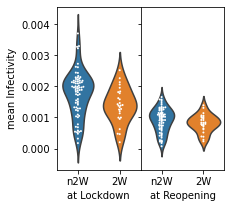

In [7]:
fig, axes = plt.subplots(1,2,figsize=(3,3), sharey=True, gridspec_kw={'wspace':0.00})
inf_mean = df_inf_all.groupby('run').mean()
sns.swarmplot(data=inf_mean, x='sw', y='infectivities_3', color='w', ax=axes[1], size=2)
sns.violinplot(data=inf_mean, x='sw', y='infectivities_3',inner=None, ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('at Reopening')
axes[1].set_xticklabels(['n2W', '2W'])

sns.swarmplot(data=inf_mean, x='sw', y='infectivities_2', color='w', ax=axes[0], size=2)
sns.violinplot(data=inf_mean, x='sw', y='infectivities_2',inner=None, ax=axes[0])
axes[0].set_xlabel('at Lockdown')
axes[0].set_ylabel('mean Infectivity')
axes[0].set_xticklabels(['n2W', '2W'])

no_mitigation_IF03_recover_frac_0.500_rw_0_ri_1_rx_0
no_mitigation_IF03_recover_frac_0.500_rw_0_ri_1_rx_0


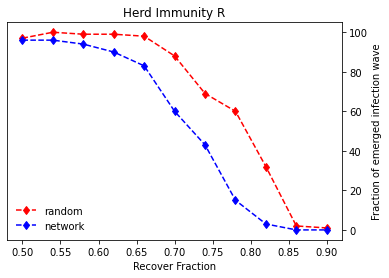

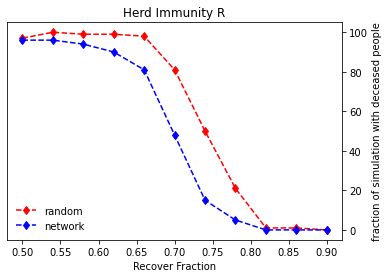

In [25]:
fig, ax = plt.subplots(1,1)
#### test cell 

data_set_name = 'Herd Immunity R'
ax.set_title(data_set_name)
plot_frac_of_Inf_waves_vs_recover_frac(ax, filenames, scenarios, server_data_folder, cutoff=20, legend=False)
print(scenarios[data_set_name])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.legend(['random','network'],loc='lower left', frameon=False)

fig1, ax1 = plt.subplots(1,1)
#### test cell 

data_set_name = 'Herd Immunity R'
ax1.set_title(data_set_name)
plot_frac_of_Inf_waves_vs_recover_frac(ax1, filenames,
                                       scenarios, server_data_folder,
                                       cutoff=1, legend=False, status='D')
print(scenarios[data_set_name])
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("fraction of simulation with deceased people")

ax1.legend(['random','network'],loc='lower left', frameon=False)

V2_RPM02_Gangelt_big_Ifreq_2_no_mitigation_IF03_infectivity_0.350_ri_1_rx_0
V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_start_2_250.000_ri_1_rx_0
V2_RPM02_Gangelt_big_Ifreq_2_close_all_IF03_disobedience_0.050_ri_1_rx_0
V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1300.000_ri_1_rx_0
CPU times: user 27.3 s, sys: 1.86 s, total: 29.1 s
Wall time: 16.8 s


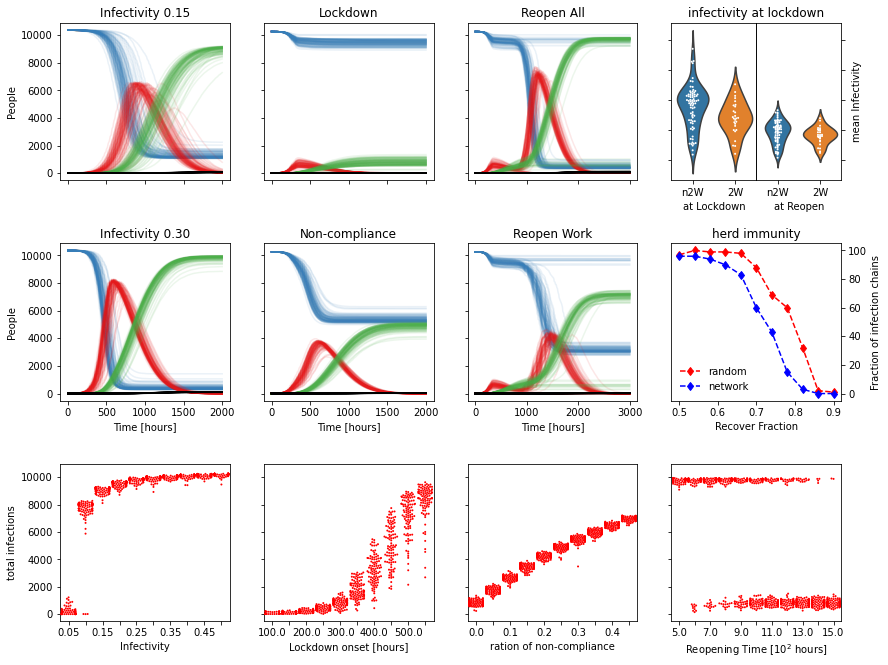

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [229]:
%%time
fig3 = plt.figure( figsize=(14,11)) #constrained_layout=True,
gs = fig3.add_gridspec(3, 4, hspace=0.4)

####
data_set_name = 'Infectivity 0.15'
f3_ax1 = fig3.add_subplot(gs[0,0])
f3_ax1.set_title(data_set_name)
plot_stat_para(f3_ax1, scenarios[data_set_name], server_data_folder)

####
data_set_name = 'Infectivity 0.30'
f3_ax2 = fig3.add_subplot(gs[1,0], sharex=f3_ax1)
f3_ax2.set_title(data_set_name)
plot_stat_para(f3_ax2, scenarios[data_set_name], server_data_folder)


####
data_set_name = 'Lockdown'
f3_ax3 = fig3.add_subplot(gs[0,1], sharey=f3_ax1)
f3_ax3.set_title(data_set_name)
plot_stat_para(f3_ax3, scenarios[data_set_name], server_data_folder)

####
data_set_name = 'Non-compliance'
f3_ax4 = fig3.add_subplot(gs[1,1], sharey=f3_ax2, sharex=f3_ax3)
f3_ax4.set_title(data_set_name)
plot_stat_para(f3_ax4, scenarios[data_set_name], server_data_folder)

####
data_set_name = 'Reopen All'
f3_ax5 = fig3.add_subplot(gs[0,2], sharey=f3_ax1)
f3_ax5.set_title(data_set_name)
plot_stat_para(f3_ax5, scenarios[data_set_name], server_data_folder)

####
data_set_name = 'Reopen Work'
f3_ax6 = fig3.add_subplot(gs[1,2], sharey=f3_ax2, sharex=f3_ax5)
f3_ax6.set_title(data_set_name)
plot_stat_para(f3_ax6,scenarios[data_set_name], server_data_folder)

#### AT LOCKDOWN and Reopen
data_set_name = 'Reopen All HM'
gs01 = gs[0,3].subgridspec(1, 2, wspace=0.0)
df_inf_all = get_infectivities_at_T(data_set_name, scenarios, server_data_folder, threshold=3000,)
inf_mean = df_inf_all.groupby('run').mean()

f3_ax72 = fig3.add_subplot(gs01[0,1])
sns.swarmplot(data=inf_mean, x='sw', y='infectivities_3', color='w', ax=f3_ax72 , size=2)
sns.violinplot(data=inf_mean, x='sw', y='infectivities_3',inner=None, ax=f3_ax72 )
#f3_ax7 = fig3.add_subplot(gs[0,3])
f3_ax72.set_title('infectivity at lockdown',x=0)
f3_ax72.set_xticklabels(['n2W', '2W'])
f3_ax72.yaxis.tick_right()
f3_ax72.set_ylabel('mean Infectivity')
f3_ax72.set_xlabel('at Reopen')
f3_ax72.yaxis.set_label_position("right")

f3_ax71 = fig3.add_subplot(gs01[0,0], sharey=f3_ax72)
sns.swarmplot(data=inf_mean, x='sw', y='infectivities_2', color='w', ax=f3_ax71 , size=2)
sns.violinplot(data=inf_mean, x='sw', y='infectivities_2',inner=None, ax=f3_ax71 )
f3_ax71.set_xlabel('at Lockdown')
f3_ax71.set_ylabel('')
f3_ax71.set_xticklabels(['n2W', '2W'])
f3_ax71.set_yticklabels([])

####
data_set_name = 'Herd Immunity R'
f3_ax8 = fig3.add_subplot(gs[1,3])
plot_frac_of_Inf_waves_vs_recover_frac(f3_ax8, filenames, scenarios, server_data_folder, cutoff=20)
f3_ax8.set_title('herd immunity')
f3_ax8.yaxis.tick_right()
f3_ax8.yaxis.set_label_position("right")
f3_ax8.legend(['random','network'],loc='lower left', frameon=False)

####
data_set_name = 'Infectivity 0.30'
#scan_folders = [x for x in filenames if 'infectivity' in x]
f3_ax9 = fig3.add_subplot(gs[2,0])
#f3_ax9.set_title(data_set_name)
f3_ax9 = plot_total_infections_scan(f3_ax9, data_set_name, filenames, server_data_folder, scenarios,)
f3_ax9.set_xlabel('Infectivity')
f3_ax9.set_ylabel('total infections')



####
data_set_name = 'Lockdown_onset'
#scan_folders = [x for  x in filenames if x.split('_').count('2') == 2 ]
f3_ax10 = fig3.add_subplot(gs[2,1])
#f3_ax10.set_title(data_set_name)
f3_ax10.set_yticklabels([])
#f3_ax10 = plot_total_infections_scan(f3_ax10, data_set_name, filenames, server_data_folder, scenarios,)
f3_ax10 = plot_total_infections_scan(f3_ax10, data_set_name, filenames, server_data_folder, scenarios,reduce_name_by=19, digits=5)
f3_ax10.set_xlabel('Lockdown onset [hours]')

####
data_set_name = 'Non-compliance'
#scan_folders = [x for  x in filenames if 'disobedience' in x.split('_')]
f3_ax11 = fig3.add_subplot(gs[2,2])
f3_ax11 = plot_total_infections_scan(f3_ax11, data_set_name, filenames, server_data_folder, scenarios,)
#f3_ax11.set_title(data_set_name)
f3_ax11.set_yticklabels([])
f3_ax11.set_xlabel('ration of non-compliance')


####
data_set_name = 'Reopen All'
#scan_folders = [x for x in filenames if x.startswith(scenarios[data_set_name][:-15])]
f3_ax12 = fig3.add_subplot(gs[2,3])
f3_ax12 = plot_total_infections_scan(f3_ax12, data_set_name, filenames, server_data_folder, scenarios,)
#f3_ax12.set_title('reopening time')
f3_ax12.set_yticklabels([])
#f3_ax12.set_xlabel('Reopening Time [hours]')
f3_ax12.set_xticklabels(['' if x.get_text()=='' else float(x.get_text())/100 for x in f3_ax12.get_xticklabels()])
f3_ax12.set_xlabel('Reopening Time [$10^2$ hours]') ### nur bei kleinen abbildungen
#plt.tight_layout()


save_figure = True 
if save_figure:
    plt.savefig('plots/fig3.svg')


In [ ]:
fig, axes = plt.subplots(4,2,figsize=(8,16), sharey=True, sharex=False) # transponiert für math + vortrag

for n,folder_scenario in enumerate(folders):
    row = int(n/2)
    col = n%2
    ax1=axes[row][col]
    plot_stat_para(ax1, prefix + folder_scenario, server_data_folder)
    ax1.set_title(scenarios[folder_scenario])
plt.tight_layout()
plt.savefig('plots/fig3.png') # or svg 
print(folders)

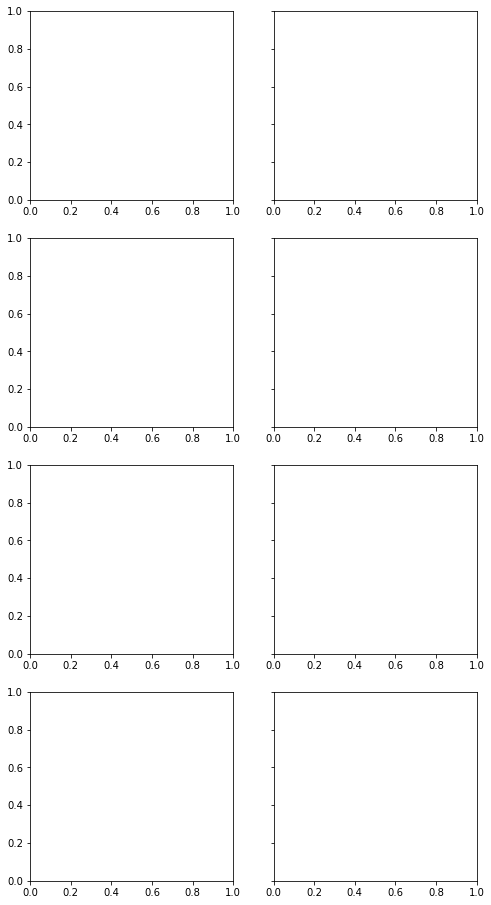

In [105]:
fig, axes = plt.subplots(4,2,figsize=(8,16), sharey=True, sharex=False) # transponiert für math + vortrag

<a id='fig4'></a>
### Figure 4 Interactions & Infections
[back to top](#main)

In [38]:
scenario = scenarios['MU 0.5 HM']

In [49]:
def assign_types(agent_id_type_dict, location_id_type_dict, df):
    df.sort_values(by='time',inplace=True)
    df['loc_type'] = df['infection_loc_ID'].map(location_id_type_dict)
    df['agent_type'] = df['infected_by_ID'].map(agent_id_type_dict)
    return(df)

def get_delta_ds(ds1,ds2, relative=False):
    if relative:
        return((ds1-ds2)/ds2)
    else:
        return(ds1-ds2)
    
def get_ID_Type_dicts(scenario, server_data_folder):
    df_ai = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_agent_infos.csv')
    df_li = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_location_infos.csv')
    agent_id_type_dict = dict(zip(df_ai['ID'].values,df_ai['Type'].values))
    location_id_type_dict = dict(zip(df_li['ID'].values,df_li['Type'].values))
    return(agent_id_type_dict, location_id_type_dict)   

def get_df_list(scenario, server_data_folder):
    dict_s, dict_l = get_ID_Type_dicts(scenario, server_data_folder)
    infect_info_filenames = os.listdir(server_data_folder+scenario+'/'+'infection_informations/')
    df_list = [pd.read_csv(server_data_folder+scenario+'/'+'infection_informations/'+x) for x in infect_info_filenames]
    mapfunc= partial(assign_types,dict_s, dict_l) #sorted for time
    return(list(map(mapfunc, df_list)), dict_s, dict_l)

def get_fractions_and_numbers_agents_locs(scenario, server_data_folder, with_mixing_loc=True):
    df_ai = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_agent_infos.csv')
    df_li = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_location_infos.csv')

    df_fraction_s = df_ai.groupby('Type').count()['ID']/len(df_ai)
    df_fraction_l = df_li.groupby('Type').count()['ID']/len(df_li)
    try:
        if with_mixing_loc:
            pass
        else:
            df_fraction_l.drop(['mixing_loc'], inplace=True)
        df_fraction_l.drop(['morgue'], inplace=True)
    except:
        pass
    
    n_people =len(df_ai)
    n_locs =len(df_li)
    fraction_nr_type_dict = {
                             'agent_type':(df_fraction_s, n_people, vpm_plot.scheduleTypeColors),
                             'loc_type':(df_fraction_l, n_locs, vpm_plot.locationTypeColors),
                             }
    return(fraction_nr_type_dict) 

def sort_most_infecting_agents(dict_s, df):
    df_group = df.groupby('infected_by_ID').count()['h_ID'].reset_index()
    df_group['type'] = df_group['infected_by_ID'].map(dict_s)
    df_group.columns = ['infected_by_ID','count','agent_type']
    df_group.sort_values('count',ascending=False,inplace=True)
    return(df_group)

def get_df_list_most_inf_agents(scenario, server_data_folder):
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder)
    dict_s, dict_l = get_ID_Type_dicts(scenario, server_data_folder)
    df_list = get_df_list(scenario, server_data_folder)
    
    mapfunc = partial(sort_most_infecting_agents, dict_s)
    df_list_sorted = list(map(mapfunc,df_list))
    return df_list_sorted, dict_s, dict_l

    
#    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder)
#dict_s, dict_l = get_ID_Type_dicts(scenario, server_data_folder)
#df_list = get_df_list(scenario, server_data_folder)
#mapfunc = partial(sort_most_infecting_agents, dict_s)
#df_list_sorted = list(map(mapfunc,df_list))

def agent_or_loc_top_infectees(dict_s, object_type, df, fraction=0.5):
    if object_type == 'loc_type':
        infectees = list(sort_most_infecting_agents(dict_s, df)['infected_by_ID'].values)
        red_infectees = infectees[:int(fraction*len(infectees))]
        df_new = df.set_index('infected_by_ID')
        df_ratio = df_new.loc[red_infectees].groupby('loc_type').count()/len(df_new.loc[red_infectees])
        return(df_ratio['infection_loc_ID'])
    
    elif object_type == 'agent_type':
        df_most_inf = sort_most_infecting_agents(dict_s, df)
        df_ratio = df_most_inf[:int(fraction*len(df_most_inf))].groupby('agent_type').count()/int(fraction*len(df_most_inf))
        return(df_ratio['count'])

def get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=1, relative=False):
    
    mapfunc2=partial(agent_or_loc_top_infectees, dict_s, object_type,  fraction=fraction)
    df_ratio_list = list(map(mapfunc2, df_list))
    #df_ratios_list = [df_s[:int(fraction*len(df_s))].groupby(object_type).count()['h_ID']/(int(fraction*len(df_s))) for df_s in df_list_sorted]
    df_ratios_all = pd.concat(df_ratio_list,axis=1)
    df_ratios_all.columns = [str(x) for x in range(100)]
    df_ratios_all.sort_index(inplace=True)

    df_is_m = df_ratios_all.mean(axis=1)
    df_is_std = df_ratios_all.std(axis=1)
    df_delta = get_delta_ds(df_is_m, fraction_nr_type_dict[object_type][0], relative=relative)
    df = df_delta.to_frame('ratio')
    
    sign={True:1,False:-1}
    df['positive']=df['ratio']>0
    df['ratio_std'] = df['ratio']+df_is_std*df['positive'].map(sign)
    df['std'] = df_is_std
    return(df)



def plot_delta(ax, df_delta, color_dict=vpm_plot.scheduleTypeColors,
               width=0.8, label_offset_y=0.01, pad=100, label_offset_x=0.01,
               with_std=True, ylim=(-.99,.6)):
            
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)       # {True: colors[0], False: colors[1]}), ax=ax)
    ax.set_ylim(ylim)
    if not 0:
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    
    if with_std:
        ax_2=ax.twinx()
        ax_2.set_ylim(ylim)
        ax_2.set_yticks([])
        df_delta['ratio_std'].plot(ax=ax_2, kind='bar',
                                   color=df_delta.index.map(color_dict),
                                   width=width, alpha=0.3)
        ax_2.set_axis_off()
        #ax_2.spines['bottom'].set_position('zero')
        patches_heights = [p.get_height() for p in ax_2.patches]
    
    df_delta['ratio'].plot(ax=ax, kind='bar',
                           color=df_delta.index.map(color_dict),
                           width=width)
    
    if not with_std:
        patches_heights = [p.get_height() for  p in ax.patches]
    
    for k,p in enumerate(ax.patches):
        #print(p.get_facecolor())
        if p.get_height() > 0:
            #ax.annotate('{:.0%}'.format(p.get_height()),
            #            (p.get_x()+label_offset_x, p.get_height() * 1.02 + label_offset_y))
            ax.annotate('{:.0%}'.format(patches_heights[k]),
                        (p.get_x()+label_offset_x, patches_heights[k] * 1.02 + label_offset_y))
        else:
            ax.annotate('{:.0%}'.format(patches_heights[k]),
                        (p.get_x()+label_offset_x, patches_heights[k] * 1.02 - label_offset_y*2))
    
    ax.tick_params(axis='x', direction='out', pad=pad, labelrotation=90) 
    return(ax)

In [41]:
scenario = scenarios['MU 2 HM']
scenario

'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'

In [421]:
object_type = 'loc_type'
fraction=0.8
df_list, dict_s, dict_l = get_df_list(scenario, server_data_folder)
df=df_list[0]
infectees = list(sort_most_infecting_agents(dict_s, df)['infected_by_ID'].values)
red_infectees = infectees[:int(fraction*len(infectees))]
#df_ratio = df.loc[red_infectees].groupby(object_type).count()['h_ID']/int(fraction*len(infectees))
#sort_most_infecting_agents(dict_s, df)
df.set_index('infected_by_ID', inplace=True)
df_ratio = df.loc[red_infectees].groupby('loc_type').count()/len(df.loc[red_infectees])
df_ratio['infection_loc_ID']

loc_type
home        0.317873
hospital    0.004423
public      0.364028
school      0.068723
work        0.244954
Name: infection_loc_ID, dtype: float64

In [422]:
infectees = list(sort_most_infecting_agents(dict_s, df)['infected_by_ID'].values)
red_infectees = infectees[:int(fraction*len(infectees))]
df_ratio = df.loc[red_infectees].groupby(object_type).count()['h_ID']/int(fraction*len(infectees))

In [423]:
df=df_list[0]
df_group = df.groupby('infected_by_ID').count()['h_ID'].reset_index()
df_group['type'] = df_group['infected_by_ID'].map(dict_s)
df_group.columns = ['infected_by_ID','count','agent_type']
df_group.sort_values('count',ascending=False,inplace=True)
df_group

,infected_by_ID,count,agent_type
1418,3260,14,under_age
1434,3288,12,under_age
1622,3698,12,adult
2104,4825,12,under_age
3454,7735,11,adult
...,...,...,...
2543,5787,1,adult
634,1439,1,adult
2546,5792,1,under_age
633,1436,1,pensioner


In [344]:
df_list[0]
fraction = 0.5
infectees = list(sort_most_infecting_agents(dict_s, df_list[0]).index)
red_infectees = infectees[:int(fraction*len(infectees))]
#df_list[0][df_list[0]['infected_by_ID'] in red_infectees]
df_loc_ratio_list = [df.loc[red_infectees].groupby('loc_type').count()['h_ID']/int(fraction*len(infectees)) for df in df_list]
df_loc_ratio_list

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [444]:
object_type= 'agent_type'
fraction = 1
mapfunc2=partial(agent_or_loc_top_infectees, dict_s, object_type,  fraction=fraction)
df_ratio_list = list(map(mapfunc2,df_list))
df_ratios_list = [df_s[:int(fraction*len(df_s))].groupby(object_type).count()['h_ID']/(int(fraction*len(df_s))) for df_s in df_list]
df_ratios_all = pd.concat(df_ratio_list,axis=1)
df_ratios_all.columns = [str(x) for x in range(100)]
df_ratios_all.sort_index(inplace=True)

df_is_m = df_ratios_all.mean(axis=1)
df_is_std = df_ratios_all.std(axis=1)

df_delta = get_delta_ds(df_is_m, fraction_nr_type_dict[object_type][0], relative=False)
df = df_delta.to_frame('ratio')

sign={True:1,False:-1}
df['positive']=df['ratio']>0
df['ratio_std'] = df['ratio']+df_is_std*df['positive'].map(sign)
df['std'] = df_is_std

In [524]:
df_list[1]

{5137: 'adult',
 3014: 'pensioner',
 9080: 'under_age',
 3015: 'pensioner',
 5136: 'adult',
 9081: 'adult',
 3016: 'pensioner',
 5140: 'pensioner',
 3017: 'pensioner',
 9082: 'under_age',
 5138: 'adult',
 9083: 'public_worker',
 3018: 'pensioner',
 5139: 'adult',
 9084: 'adult',
 3019: 'adult',
 5142: 'pensioner',
 9086: 'under_age',
 3020: 'public_worker',
 5141: 'pensioner',
 9087: 'under_age',
 9085: 'under_age',
 3021: 'adult',
 5144: 'pensioner',
 5143: 'adult',
 3022: 'adult',
 5145: 'public_worker',
 3023: 'adult',
 5146: 'adult',
 3026: 'under_age',
 3025: 'under_age',
 5150: 'adult',
 3027: 'adult',
 9088: 'public_worker',
 3028: 'adult',
 9089: 'adult',
 3024: 'under_age',
 9090: 'under_age',
 3031: 'adult',
 9093: 'public_worker',
 9091: 'under_age',
 3030: 'adult',
 9092: 'under_age',
 9094: 'adult',
 3029: 'under_age',
 3032: 'pensioner',
 9095: 'adult',
 9097: 'adult',
 3033: 'pensioner',
 3034: 'pensioner',
 9096: 'adult',
 3036: 'adult',
 9607: 'adult',
 6812: 'adult',


In [495]:
df_list= get_df_list(scenario, server_data_folder)

In [530]:
frac_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder, with_mixing_loc=True)
frac_dict['loc_type'][0]

Type
home          0.979250
hospital      0.000200
mixing_loc    0.000200
public        0.004988
school        0.000399
work          0.014765
Name: ID, dtype: float64

In [536]:
df_count_loc.columns=np.arange(0,100,1)

In [541]:
df_count_loc = pd.concat([df.groupby('loc_type').count()['h_ID'] for df in df_list[0]],axis=1)
df_frac_loc = df_count_loc/df_count_loc.sum()
df_l_mean = df_frac_loc.mean(axis=1)
df_l_std = df_frac_loc.std(axis=1)
df_l_w = frac_dict['loc_type'][0]

In [555]:
df_delta = df_l_mean-df_l_w
df_ratio = df_delta.to_frame('ratio')
sign={True:1,False:-1}
df_ratio['positive']=df_ratio['ratio']>0
df_ratio['ratio_std'] = df_ratio['ratio']+df_l_std*df['positive'].map(sign)
df_ratio['std'] = df_l_std

In [569]:
s =sets['BF_IARS']
inv_sc_names[s[0]]

'IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'

In [580]:
df_delta

home          -0.695071
hospital      11.026601
mixing_loc          NaN
public        53.989946
school        70.090886
work          17.913882
dtype: float64

In [47]:
for sc in s:
    scenario = inv_sc_names[sc]
    df_list= get_df_list(scenario, server_data_folder)
    frac_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder, with_mixing_loc=True)

    df_count_loc = pd.concat([df.groupby('loc_type').count()['h_ID'] for df in df_list[0]],axis=1)
    df_count_loc.columns=np.arange(0,100,1)
    df_frac_loc = df_count_loc/df_count_loc.sum()
    df_l_mean = df_frac_loc.mean(axis=1)
    df_l_std = df_frac_loc.std(axis=1)
    df_l_w = frac_dict['loc_type'][0]


    df_delta = (df_l_mean-df_l_w)/df_l_w
    df_ratio = df_delta.to_frame('ratio')
    sign={True:1,False:-1}
    df_ratio['positive']=df_ratio['ratio']>0
    df_ratio['ratio_std'] = df_ratio['ratio']+df_l_std*df['positive'].map(sign)
    df_ratio['std'] = df_l_std

    f,a= plt.subplots(1,1)
    plot_delta(a, df_ratio, color_dict=vpm_plot.locationTypeColors, ### colors per object type !!!
                       width=0.8, label_offset_y=0.040, pad=100, label_offset_x=-0.01,
                       ylim=(-100,100.2), with_std=True)
    a.set_title(sc)

KeyError: 'B'

In [533]:
df_l_mean-df_l_w


Type
home          0.979250
hospital      0.000200
mixing_loc    0.000200
public        0.004988
school        0.000399
work          0.014765
Name: ID, dtype: float64

FileNotFoundError: [Errno 2] File server_data/V2_RPM02_Gangelt/BF_IAR_1.2_0.0_24.0/BF_IAR_1._agent_infos.csv does not exist: 'server_data/V2_RPM02_Gangelt/BF_IAR_1.2_0.0_24.0/BF_IAR_1._agent_infos.csv'

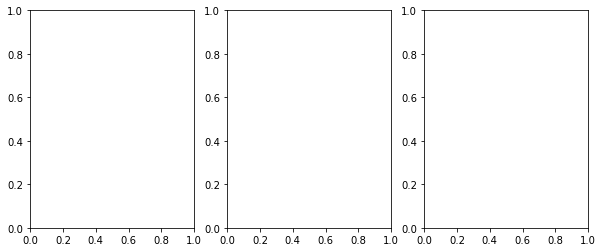

In [46]:
fig, axes = plt.subplots(1,3,figsize=(10,4), sharex=True)
#fraction=0.2
object_type = 'agent_type'
df_list, dict_s, dict_l = get_df_list(scenario, server_data_folder)
fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder, with_mixing_loc=True)
for i,frac in enumerate([0.2,0.5,1.0]):
    df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac, relative=True )
    ax1 = plot_delta(axes[i], df, color_dict=fraction_nr_type_dict[object_type][2],
               width=0.8, label_offset_y=0.03, pad=130, label_offset_x=-0.01, with_std=True, ylim=(-1.4,1.4))

    

In [600]:
def sort_most_infecting_agents(dict_s,df,):
    df_group = df.groupby('infected_by_ID').count()['h_ID'].reset_index()
    df_group['type'] = df_group['infected_by_ID'].map(dict_s)
    df_group.columns = ['infected_by_ID','count','type']
    df_group.sort_values('count',ascending=False,inplace=True)
    return(df_group)

In [604]:

fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder)
dict_s, dict_l = get_ID_Type_dicts(scenario, server_data_folder)
df_list = get_df_list(scenario, server_data_folder)
mapfunc = partial(sort_most_infecting_agents, dict_s)
df_list_sorted = list(map(mapfunc,df_list))



In [33]:
scenarios_delta = ['Reopen All HM',
                    'MU 2 HM',
                    'MU 0.5 HM',
                    'MU 2 HM MIX']

In [765]:
fraction_dict={}
for frac in [0.2,0.5,1.0]:
    df_delta_dict = {}
    for sc in scenarios_delta:
        scenario = scenarios[sc]
        try:
            df_delta_s = get_df_delta(scenario, server_data_folder,'agent_type', fraction=frac)
            df_delta_l = get_df_delta(scenario, server_data_folder,'loc_type',  fraction=frac)
            df_delta_dict[sc] = (df_delta_s,df_delta_l) 
        except:
            pass
    fraction_dict[frac] = df_delta_dict    
    print('not possible for: ',[x for x in scenarios_delta if x not in df_delta_dict])   
    #list(scenarios.keys())
    
df_delta_l    

not possible for:  ['Reopen All HM', 'MU 2 HM', 'MU 0.5 HM', 'MU 2 HM MIX']
not possible for:  ['Reopen All HM', 'MU 2 HM', 'MU 0.5 HM', 'MU 2 HM MIX']
not possible for:  ['Reopen All HM', 'MU 2 HM', 'MU 0.5 HM', 'MU 2 HM MIX']


home         -0.457984
hospital      0.024230
mixing_loc         NaN
public        0.289909
school        0.048778
work          0.101582
dtype: float64

In [231]:
folders_all = os.listdir(folder)

In [212]:
scenarios_delta = ['Reopen All HM',
                    'MU 2 HM',
                    'MU 0.5 HM',
                    'MU 2 HM MIX']

scenarios_delta = ['Reopen All HM', 'MU 2 HM', 'MU 8 HM', 'MU 0.5 HM', 'MU 0.5 HM MIX', 'MU 8 HM MIX', 'MU 2 HM MIX']

In [428]:
folders_all
acceptable_folder = []
for f in folders_all:
    try:
        pd.read_csv(folder+f+'/'+f[:-9]+'agent_infos.csv')
        acceptable_folder.append(f)
        print(f)
    except:
        pass

IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_None_ 1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0
parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_test_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF06_None_1.000_ri_1_rx_0
parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_672.000_ri_1_rx_0
parralel_HM_test_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF06_None_1.000_ri_1_rx_0
parralel

### contribution of schedule types

In [40]:
sc_names={
        'IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_25.0_49.0',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_None_ 1.000_ri_1_rx_0':'inf_0.075',
        'IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_75.0_99.0',
        'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'MIX_Baseline',
        'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0':'MIX_inf_1.2',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'Baseline',
        'IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_0.0_24.0',
        'IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_25.0_49.0',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_672.000_ri_1_rx_0':'reopen_all_672',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_None_1.000_ri_1_rx_0':'close_all_2_weeks',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0':'inf_1.2',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1008.000_ri_1_rx_0':'reopen_all_1008',
        'IAR_1.2_50.0_74.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_50.0_74.0',
        'IAR_1.2_75.0_99.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_75.0_99.0',
        'IAR_1.2_50.0_74.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_50.0_74.0',
        'IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_0.0_24.0',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_IF03_None_1.000_ri_1_rx_0':'close_all_1344',
        'IAR_1.2_26.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_26.0_49.0'
        }

In [41]:
BF_IARS = [x for x in sc_names.values() if x.startswith('BF_IAR')]
IARS = [x for x in sc_names.values() if x.startswith('IAR')]
MIX = [x for x in sc_names.values() if x.startswith('MIX')]
INF = [x for x in sc_names.values() if x.startswith('inf')]
REST = [x for x in sc_names.values() if x not in BF_IARS+IARS+MIX+INF]
inv_sc_names = {v: k for k, v in sc_names.items()}
IARS.sort(),BF_IARS.sort(),MIX.sort(),INF.sort(),REST.sort()

(None, None, None, None, None)

IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_50.0_74.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_26.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_50.0_74.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0
parralel_HM_V2_RPM02_hm_Gangelt_bi

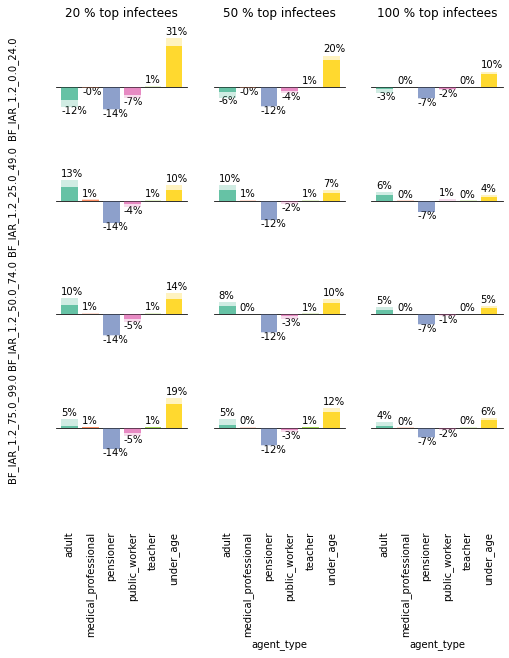

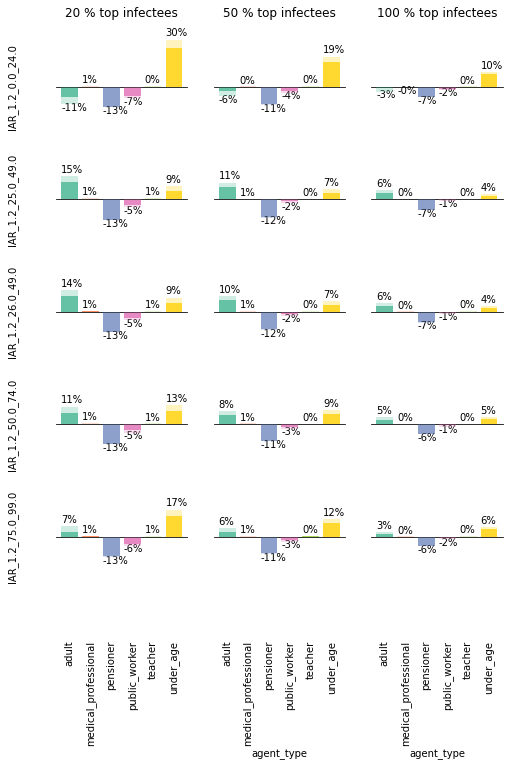

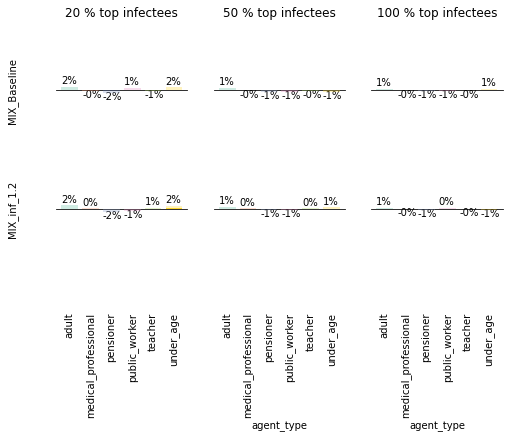

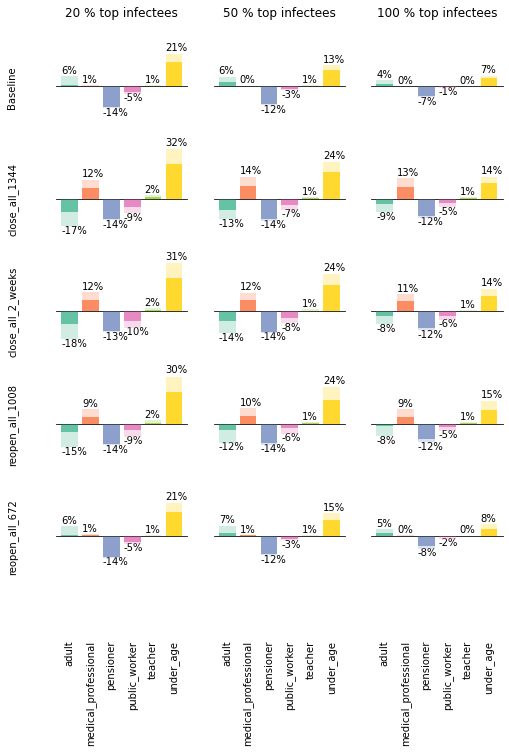

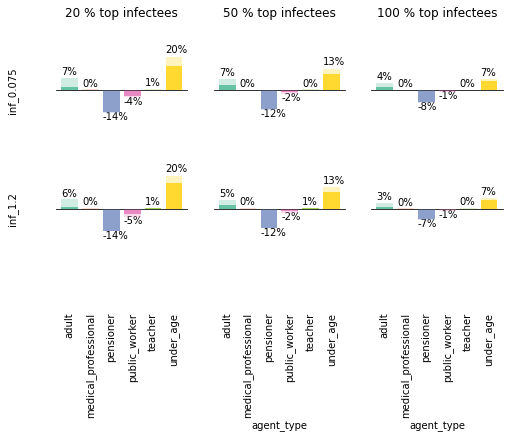

In [50]:
sets = {'BF_IARS':BF_IARS, 'IARS':IARS, 'MIX':MIX, 'REST':REST, 'INF':INF}

for s in sets: 

    fig, axes = plt.subplots(len(sets[s]),3,figsize=(8,len(sets[s])*2.0), sharex=True)
    object_type = 'agent_type'

    for k,scenario in enumerate(sets[s]):

        print(inv_sc_names[scenario])
        df_list, dict_s, dict_l = get_df_list(inv_sc_names[scenario], server_data_folder)
        fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(inv_sc_names[scenario], server_data_folder, with_mixing_loc=True)

        for i,frac in enumerate([0.2,0.5,1.0]):
            df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
            plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                       width=0.8, label_offset_y=0.020, pad=100, label_offset_x=-0.01,
                       ylim=(-.25,.35), with_std=True)
            axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, scenario, rotation=90, verticalalignment='center')

    plt.savefig('plots/fig_OUR_'+s+'_schedules.png', bbox_inches='tight') 
    plt.savefig('plots/fig_OUR_'+s+'_schedules.svg', bbox_inches='tight')    

In [492]:
df

,ratio,positive,ratio_std,std
home,-0.679325,False,-0.693635,0.014310
hospital,0.003201,True,0.003850,0.000649
mixing_loc,NaN,False,NaN,NaN
public,0.387593,True,0.414979,0.027387
school,0.072847,True,0.088395,0.015549
work,0.217258,True,0.234555,0.017297


### Locations

IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_50.0_74.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_26.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_50.0_74.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0
parralel_HM_V2_RPM02_hm_Gangelt_bi

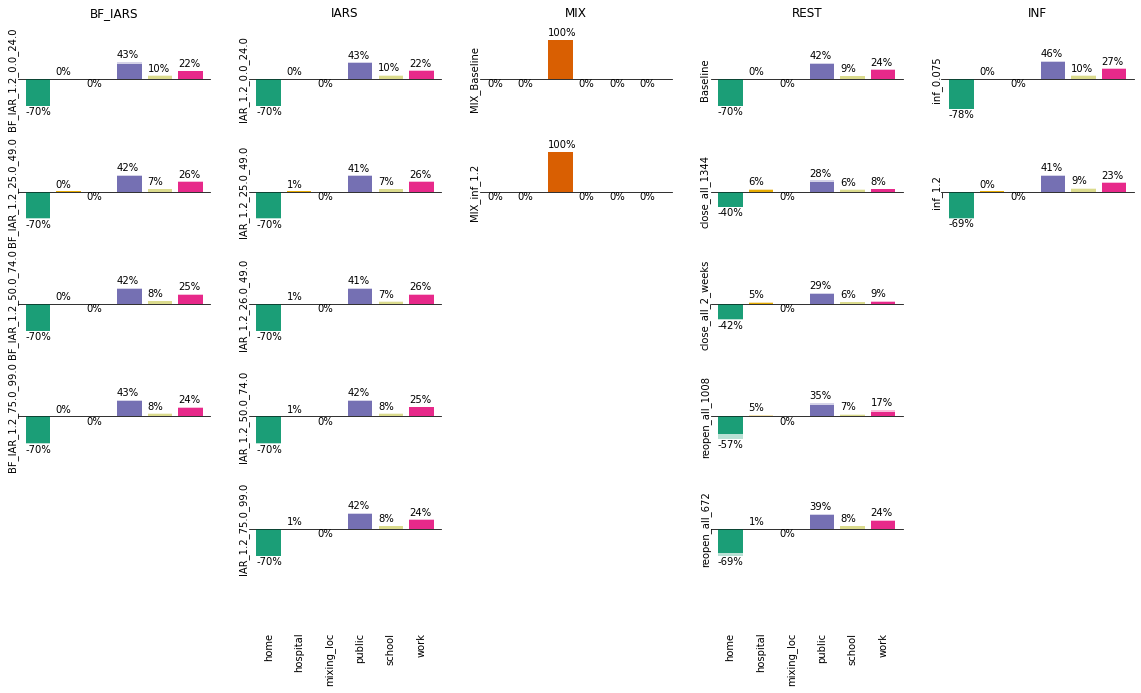

In [17]:
sets = {'BF_IARS':BF_IARS, 'IARS':IARS, 'MIX':MIX, 'REST':REST, 'INF':INF}
object_type = 'loc_type'
frac = 1.0
max_nr_folders = max([len(sets[s]) for s in sets])
fig, axes = plt.subplots(len(sets),max_nr_folders,figsize=(len(sets)*4,max_nr_folders*2.0), sharex=True)
all_axis = list(axes.flatten())

for i,s in enumerate(sets): 
    for k,scenario in enumerate(sets[s]):
        print(inv_sc_names[scenario])
        df_list, dict_s, dict_l = get_df_list(inv_sc_names[scenario], server_data_folder)
        fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(inv_sc_names[scenario], server_data_folder, with_mixing_loc=True)

        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[k][i], df, color_dict=vpm_plot.locationTypeColors, ### colors per object type !!!
                   width=0.8, label_offset_y=0.15, pad=100, label_offset_x=-0.01,
                   ylim=(-1.2,1.2), with_std=True)
        axes[0][i].set_title(s, y=1.1)
        axes[k][i].text(-1,0, scenario, rotation=90, verticalalignment='center')
        all_axis.remove(axes[k][i])
        
[ax.set_axis_off() for ax in all_axis]        
plt.savefig('plots/fig_OUR_locactions.png', bbox_inches='tight') 
plt.savefig('plots/fig_OUR_locations.svg', bbox_inches='tight')    

In [34]:
acceptable_folder

fig, axes = plt.subplots(len(acceptable_folder),3,figsize=(8,len(acceptable_folder)*3), sharex=True)
object_type = 'agent_type'

for k,scenario in enumerate(acceptable_folder):
    print(scenario)
    #df_list_sorted = get_df_list_most_inf_agents(scenario,server_data_folder)
    try:
        df_list, dict_s, dict_l = get_df_list(scenario, server_data_folder)
        fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder, with_mixing_loc=True)

        for i,frac in enumerate([0.2,0.5,1.0]):
            df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
            #df = get_df_delta_from_list(df_list_sorted, 'agent_type', fraction=frac )
            #df['ratio_std'].plot(kind='bar', color='gray', alpha=0.2, ax=axes[i])
            #df['ratio'].plot(kind='bar', ax=axes[i])
            plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                       width=0.8, label_offset_y=0.02, pad=100, label_offset_x=-0.01, with_std=True)
            axes[k][i].set_ylim(-.18,.35)
            axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, sc_names[scenario], rotation=90, verticalalignment='center')
    except:
        pass

NameError: name 'acceptable_folder' is not defined

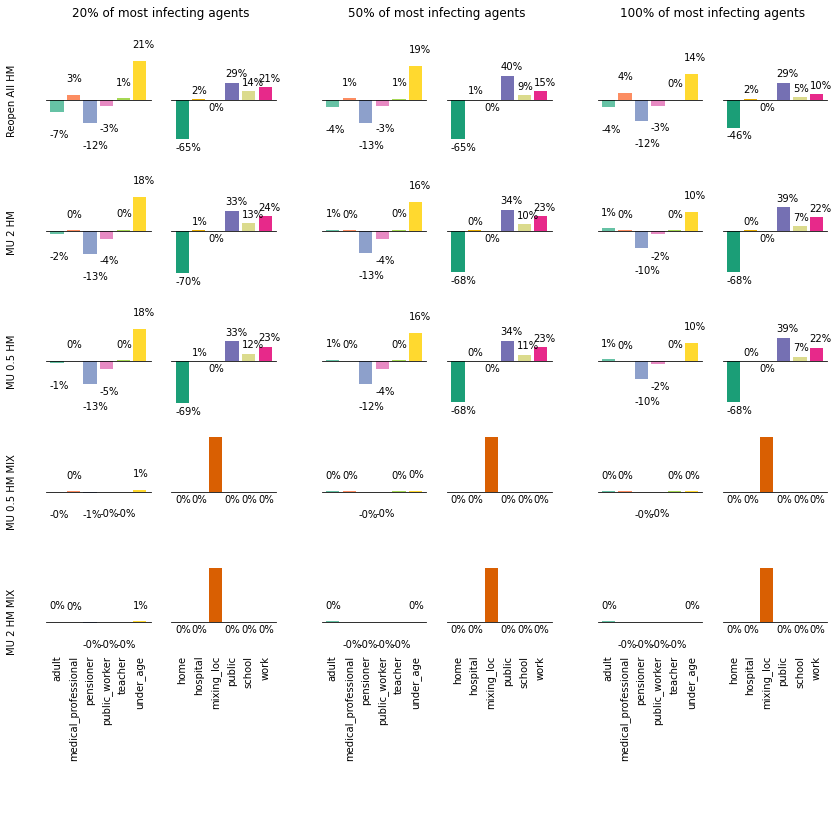

In [570]:
fig4 = plt.figure(figsize=(14,14))

gs0 = fig4.add_gridspec(1,3, hspace=0.1)

#gs00 = gs0[1].subgridspec(x, 2)
#gs01 = gs0[2].subgridspec(x, 2)
#gs02 = gs0[3].subgridspec(x, 2)

scenario_names = ['scenario 1', 'scenario 2', 'scenario 4',
                   'scenario 3','scenario 4', 'scenario 6',
                  ]
scenario_names_2 = ['t 1', 'b 2', 'e 4',
                   'scenario 3',
                  ]

#axes1 = {}
#axes2 = {}
axes = []
gs_list=[]
for i,frac in enumerate(fraction_dict):
    x = len(fraction_dict[frac])
    gs_small = gs0[i].subgridspec(x+1, 2)
    #for title
    axo = fig4.add_subplot(gs0[i])
    axo.set_title(str(int(frac*100))+'%'+ ' of most infecting agents' ,y=1.03)
    axo.axis('off')
    axes_i=[]
    for k,sc in  enumerate(fraction_dict[frac]):
        ax1 = fig4.add_subplot(gs_small[k, 0])
        ax2 = fig4.add_subplot(gs_small[k, 1])
        axes_i.append([ax1,ax2])
        
        df_delta_s, df_delta_l = fraction_dict[frac][sc]

        plot_delta(ax1, df_delta_s,color_dict=fraction_nr_type_dict['agent_type'][2],
                   label_offset_y=0.07, label_offset_x=-0.03, pad=30, width=0.8)
        plot_delta(ax2, df_delta_l, color_dict=fraction_nr_type_dict['loc_type'][2],
                   label_offset_y=0.09, label_offset_x=-0.03, pad=30, width=0.8)
        #ax1.set_title(sc)
        #ax2.set_title(sc, x=0)
        ax1.set_ylim(-0.3,0.3)
        ax2.set_ylim(-0.9,0.9)
        if k < len(df_delta_dict)-1:
            ax1.set_xticklabels([])
            ax2.set_xticklabels([])
        ax1.set_xlabel('')
        ax2.set_xlabel('')
        
        if i==0:   
            ax1.text(-3,0, sc, rotation=90, verticalalignment='center') 
        else:
            pass
    axes.append(axes_i)
    
plt.savefig('plots/fig4_all_frac.svg')
plt.savefig('plots/fig4_all_frac.png')
    

In [40]:
fraction = 0.5
df_delta_dict = {}
for sc in scenarios_delta:
    scenario = scenarios[sc]
    try:
        df_delta_s = get_df_delta(scenario, server_data_folder,'agent_type', fraction=fraction)
        df_delta_l = get_df_delta(scenario, server_data_folder,'loc_type',  fraction=fraction)
        df_delta_dict[sc] = (df_delta_s,df_delta_l) 
    except:
        pass
    
print('not possible for: ',[x for x in scenarios_delta if x not in df_delta_dict])   
#list(scenarios.keys())

NameError: name 'scenarios_delta' is not defined

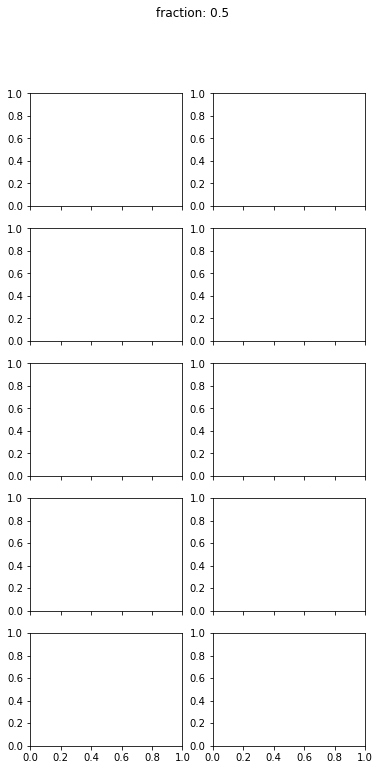

In [36]:
fig, ax = plt.subplots(5,2, figsize=(6,12), sharex=True)
fig.suptitle('fraction: '+str(fraction))
for k,scenarios[sc] in  enumerate(df_delta_dict):
    df_delta_s, df_delta_l = df_delta_dict[sc]
    ax1=ax[k][0]
    ax2=ax[k][1]
    plot_delta(ax1, df_delta_s,color_dict=fraction_nr_type_dict['agent_type'][2], label_offset_y=0.07, width=0.8)
    plot_delta(ax2, df_delta_l, color_dict=fraction_nr_type_dict['loc_type'][2], label_offset_y=0.07, width=0.8)
    ax1.set_title(sc)
    ax2.set_title(sc)
    ax1.set_ylim(-0.3,0.3)
    ax2.set_ylim(-0.85,0.85)
plt.savefig('plots/fig4_1'+str(fraction)+'.svg')    
#df_delta_l.plot(kind='bar')

In [488]:
fraction = 1
df_delta_dict = {}
for sc in scenarios_delta:
    scenario = scenarios[sc]
    try:
        df_delta_s = get_df_delta(scenario, server_data_folder,'agent_type', fraction=fraction)
        df_delta_l = get_df_delta(scenario, server_data_folder,'loc_type',  fraction=fraction)
        df_delta_dict[sc] = (df_delta_s,df_delta_l) 
    except:
        pass
    
print('not possible for: ',[x for x in scenarios_delta if x not in df_delta_dict])   
#list(scenarios.keys())

not possible for:  ['Herd Immunity R', 'Herd Immunity W', 'MU 8 HM', 'MU 8 HM MIX']


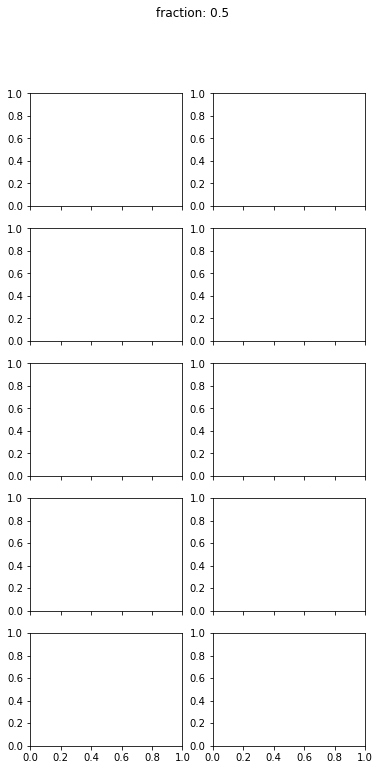

In [39]:
fig, ax = plt.subplots(5,2, figsize=(6,12), sharex=True)
fig.suptitle('fraction: '+str(fraction))
for k,sc in  enumerate(df_delta_dict):
    df_delta_s, df_delta_l = df_delta_dict[sc]
    ax1=ax[k][0]
    ax2=ax[k][1]
    plot_delta(ax1, df_delta_s,color_dict=fraction_nr_type_dict['agent_type'][2], label_offset=0.07, width=0.8)
    plot_delta(ax2, df_delta_l, color_dict=fraction_nr_type_dict['loc_type'][2], label_offset=0.07, width=0.8)
    ax1.set_title(sc)
    ax2.set_title(sc)
    ax1.set_ylim(-0.3,0.3)
    ax2.set_ylim(-0.85,0.85)
plt.savefig('plots/fig4_1'+str(fraction)+'.svg')    
#df_delta_l.plot(kind='bar')

In [38]:
df_ratios_list = [df_s[:int(fraction*len(df_s))].groupby('agent_type').count()['h_ID']/(int(fraction*len(df_s))) for df_s in df_list_assigned]

NameError: name 'df_list_assigned' is not defined

In [401]:
df_delta

adult                  -0.012867
medical_professional    0.002098
pensioner              -0.126723
public_worker          -0.045518
teacher                 0.004231
under_age               0.179019
dtype: float64

In [253]:
n_people =len(df_ai)
fraction = 0.20 

df_ratios_list = [df_s[:int(fraction*len(df_s))].groupby('agent_type').count()['h_ID']/(int(fraction*len(df_s))) for df_s in df_list_assigned]

In [254]:
int(fraction*len(df_s))

1999

In [255]:
df_ratios_all = pd.concat(df_ratios_list,axis=1, names = [str(x) for x in range(100)])
df_ratios_all.columns = [str(x) for x in range(100)]

In [376]:
df_ratios_all.sort_index(inplace=True)
df_ratios_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
agent_type,,,,,,,,,,,,,,,,,,,,,
adult,0.519260,0.519120,0.520321,0.520632,0.520141,0.519202,0.520080,0.520812,0.518962,0.520506,...,0.519657,0.519202,0.519461,0.520582,0.521026,0.519720,0.520101,0.5200,0.520471,0.520280
medical_professional,0.009505,0.008905,0.009032,0.008660,0.009063,0.008978,0.009036,0.009137,0.008982,0.008608,...,0.009073,0.008978,0.008982,0.009036,0.008718,0.008987,0.009548,0.0090,0.008700,0.009014
pensioner,0.014007,0.014144,0.014049,0.014264,0.014099,0.013965,0.014056,0.014213,0.013972,0.014177,...,0.014113,0.013965,0.013972,0.014056,0.014359,0.013979,0.014070,0.0140,0.014330,0.014021
public_worker,0.084542,0.084861,0.084797,0.085583,0.085096,0.085287,0.084839,0.085787,0.084830,0.085570,...,0.085181,0.084788,0.085329,0.084839,0.084615,0.085372,0.084925,0.0855,0.085466,0.085128
teacher,0.019510,0.019382,0.020070,0.018849,0.020141,0.019950,0.020080,0.019289,0.019960,0.019241,...,0.020161,0.019950,0.019960,0.020080,0.018974,0.019970,0.020101,0.0200,0.018936,0.020030
under_age,0.353177,0.353588,0.351731,0.352012,0.351460,0.352618,0.351908,0.350761,0.353293,0.351899,...,0.351815,0.353117,0.352295,0.351406,0.352308,0.351972,0.351256,0.3515,0.352098,0.351527


In [264]:
df_fraction_s = df_ai.groupby('Type').count()['ID']/len(df_ai)
df_fraction_l = df_li.groupby('Type').count()['ID']/len(df_li)
#df_fraction_s
#df_fraction_w

In [274]:
df_is_m - df_fraction_s

agent_type
adult                  -0.005644
medical_professional    0.003070
pensioner              -0.128434
public_worker          -0.050574
teacher                 0.006082
under_age               0.175500
dtype: float64

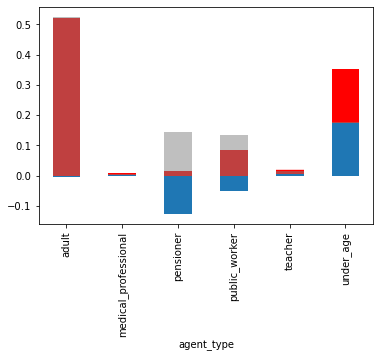

In [280]:
df_is_m = df_ratios_all.mean(axis=1)
df_is_std = df_ratios_all.std(axis=1)

df_m_std = df_is_m + df_is_std
df_m_std.plot(kind='bar', color='r',alpha=0.2)
df_is_m.plot(kind='bar', color='r')
df_fraction_s.plot(kind='bar', color='gray',alpha=0.5)
##delta

        
df_delta = get_delta_ds(df_is_m,df_fraction_s,relative=False)


In [317]:
df_t = df_delta.to_frame().reset_index()
df_t.columns =['agent_type', 'change']

In [325]:
df_delta.index.map(scheduleTypeColors)

MultiIndex([(               0.4, 0.7607843137254902,  0.6470588235294118, 1.0),
            (0.9882352941176471, 0.5529411764705883,  0.3843137254901961, 1.0),
            (0.5529411764705883, 0.6274509803921569,   0.796078431372549, 1.0),
            (0.9058823529411765, 0.5411764705882353,  0.7647058823529411, 1.0),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0),
            (               1.0, 0.8509803921568627,  0.1843137254901961, 1.0)],
           names=['agent_type', 'agent_type', 'agent_type', 'agent_type'])

In [301]:
df_delta.index.map(scheduleTypeColors)

MultiIndex([(               0.4, 0.7607843137254902,  0.6470588235294118, 1.0),
            (0.9882352941176471, 0.5529411764705883,  0.3843137254901961, 1.0),
            (0.5529411764705883, 0.6274509803921569,   0.796078431372549, 1.0),
            (0.9058823529411765, 0.5411764705882353,  0.7647058823529411, 1.0),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0),
            (               1.0, 0.8509803921568627,  0.1843137254901961, 1.0)],
           names=['agent_type', 'agent_type', 'agent_type', 'agent_type'])

(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)
(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)
(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)
(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)
(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)
(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)
(0.4, 0.7607843137254902, 0.6470588235294118, 1.0)
(0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0)
(0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0)
(0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 1.0)
(0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0)
(1.0, 0.8509803921568627, 0.1843137254901961, 1.0)


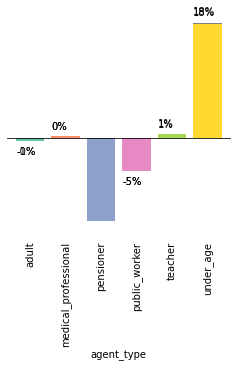

In [367]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
label_offset=0.01

df_delta_std = df_delta + df_is_std
df_delta_std.plot(kind='bar', color ='gray', width=0.8)

def plot_delta(ax, df_delta, color_dict=scheduleTypeColors, width=0.8, label_offset=0.01):
    
    df_delta.plot(kind='bar', color =df_delta.index.map(scheduleTypeColors), width=width)#, color=df['positive'].map(


    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)       # {True: colors[0], False: colors[1]}), ax=ax)
    if not 0:
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
    #ax.set_ylim(df['values'].min() * 1.4-0.1, df['values'].max() * 1.5+0.1)
    ax.xaxis.set_ticks_position('none')
    #ax.set_title(title, pad=30)

    for p in ax.patches:
        print(p.get_facecolor())
        if p.get_height() > 0:
            ax.annotate('{:.0%}'.format(p.get_height()),
                        (p.get_x(), p.get_height() * 1.02 + label_offset))
        else:
            ax.annotate('{:.0%}'.format(p.get_height()),
                        (p.get_x(), p.get_height() * 1.02 - label_offset*2))

    ax.tick_params(axis='x', direction='out', pad=100, labelrotation=90)   

    return ax 

In [335]:
color = list(df_delta.reset_index()['agent_type'].map(scheduleTypeColors).values)

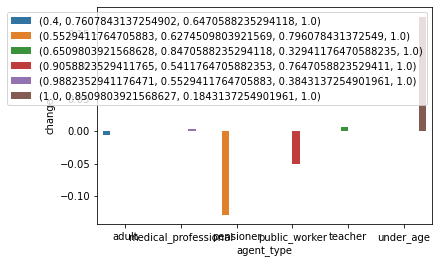

In [339]:
sns.barplot(x='agent_type', y='change', data=df_t, hue=color)    

KeyError: 'values'

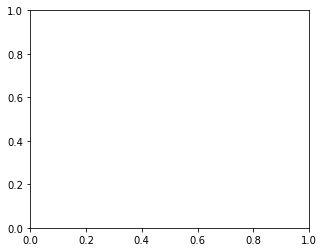

In [283]:
def plot_ratio_change(df, cmap_='Set1',
                      ax=None,
                      label_offset=0.09,
                      title='Title',
                      save_figure=True,
                      output_folder='plots/',
                      y_axis=True,
                      ):
    """
    plot the change between two input Dataframes as bar plot without grid
    :return: axes of plot
    """
    # if df.index.values[0] in scheduleTypeColors:
    #    colors = [scheduleTypeColors[x] for x in df.index.values]
    # elif df.index.values[0] in locationTypeColors:
    #    colors = [locationTypeColors[x] for x in df.index.values]
    # else:
    cmap = plt.get_cmap(cmap_)
    colors = cmap(np.arange(0, 2))
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    # plot
    df['values'].plot(kind='bar', color=df['positive'].map(
        {True: colors[0], False: colors[1]}), ax=ax)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', direction='out', pad=100, labelrotation=90)
    if not y_axis:
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
    ax.set_ylim(df['values'].min() * 1.4-0.1, df['values'].max() * 1.5+0.1)
    ax.xaxis.set_ticks_position('none')
    ax.set_title(title, pad=30)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate('{:.0%}'.format(p.get_height()),
                        (p.get_x(), p.get_height() * 1.02 + label_offset))
        else:
            ax.annotate('{:.0%}'.format(p.get_height()),
                        (p.get_x(), p.get_height() * 1.02 - label_offset*2))

    if save_figure:
        plt.savefig(output_folder + title + '.png', bbox_inches='tight')
    return ax

In [ ]:
    df_world_m = df_world.mean()
    df_data_m = df_data.mean()
    df_series = df_data_m-df_world_m
    if relative:
        df_series = df_series/df_world_m
    else:
        pass
    df = df_series.to_frame('values')
    df['positive'] = df > 0
    df.sort_index(inplace=True)
    return df

In [138]:

df = pd.concat(df_list)
df.sort_values(by='time',inplace=True)
df.drop(columns=['h_ID','time'], axis=1, inplace=True)
id_type_dict = dict(zip(df_ai['ID'].values,df_ai['Type'].values))
#df['type']=df['ID'].map(id_type_dict)
df

,infection_loc_ID,infected_by_ID
0,6,3
0,6,3
0,6,4
0,6,3
0,6,3
...,...,...
9652,131,434
9653,274,3900
9654,1443,2012
9655,3753,7647


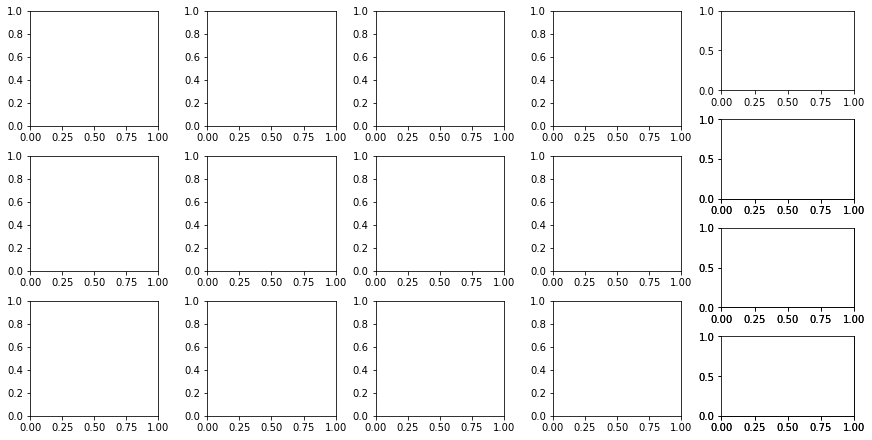

In [124]:
fig4 = plt.figure(constrained_layout=True, figsize=(12,6))

gs0 = fig4.add_gridspec(1,5)

gs00 = gs0[0:2].subgridspec(3, 2)
gs01 = gs0[2:4].subgridspec(3, 2)
gs02 = gs0[4].subgridspec(4,1)

scenario_names = ['scenario 1', 'scenario 2', 'scenario 4',
                   'scenario 3','scenario 4', 'scenario 6',
                  ]
scenario_names_2 = ['t 1', 'b 2', 'e 4',
                   'scenario 3',
                  ]

axes1 = {}
axes2 = {}
axes3 = {}

for k, scenario in enumerate(scenario_names):
    col = int(k/3)
    row = k%3
    axes1[scenario] = fig4.add_subplot(gs00[row, col])
    axes2[scenario] = fig4.add_subplot(gs01[row, col])
    
for k, scenario in enumerate(scenario_names_2):
    if k!=0:
        axes3[scenario] = fig4.add_subplot(gs02[k], sharex= axes3[scenario_names_2[k-1]])
    axes3[scenario] = fig4.add_subplot(gs02[k],)
    
    
#ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')    
#
#plt.savefig('plots/fig3.svg')



def plot_stat_para(ax, folder_scenerario):
    for stat in ['S','I','R','D']:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenerario+'/'+folder_scenerario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat], ax=ax)
    ax.set_ylabel('People')
    ax.set_xlabel('Time, [hours]')
    

def plot_stat_para(ax, folder_scenario, statii=['S','I','R','D'], log=False):
    for stat in statii:
        df_stat = pd.read_csv(server_data_folder+folder_scenario+'/'+folder_scenario[:-10]+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not stat.startswith('c'):
            df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat], ax=ax)
        else:
            df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat[10:]], ax=ax)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')

def plot_stat_para_mean(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False, ci=False):
    for stat in statii:
        df_stat = pd.read_csv(server_data_folder+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
        

#### plot fig3

['no_mitigation_IF03_infectivity_0.300_ri_1_rx_0', 'no_mitigation_IF03_infectivity_0.150_ri_1_rx_0', 'close_all_IF03_disobedience_0.000_ri_1_rx_0', 'close_all_IF03_disobedience_0.250_ri_1_rx_0', 'close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0', 'close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0', 'close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0', 'close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0']


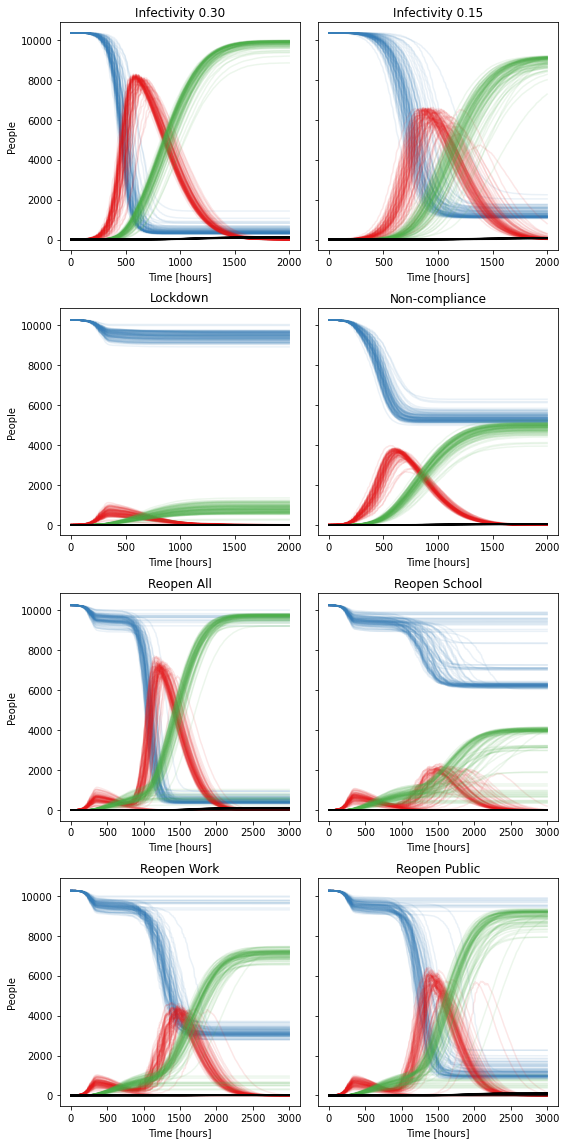

In [4]:
fig, axes = plt.subplots(4,2,figsize=(8,16), sharey=True, sharex=False) # transponiert für math + vortrag

for n,folder_scenario in enumerate(folders):
    row = int(n/2)
    col = n%2
    ax1=axes[row][col]
    plot_stat_para(ax1, prefix + folder_scenario, server_data_folder)
    ax1.set_title(scenarios[folder_scenario])
plt.tight_layout()
plt.savefig('plots/fig3.png') # or svg 
print(folders)

In [67]:
def plot_stat_para_mean_ci(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
            df_stat.std(axis=1)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
#ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.05)

In [7]:
def get_df_total_status(files_folder, server_data_folder, status = 'I', digits=5, time_loc=-1):
    """:returns: DataFrame with status at each t-1 for each repetition and each parameter"""    
    if status == 'I':
        stat = 'cumulativ_WasInfected'
    else:
        stat = status
    files_dict={}
    for folder_scenario in  files_folder:
        try:
            df = pd.read_csv(server_data_folder+ folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        except:
            df = pd.read_csv(server_data_folder+ folder_scenario+'/'+folder_scenario[:-10]+'_'+stat+'.csv')        
        df.drop('time',axis=1,inplace=True)
        param_value = float(folder_scenario.split('_')[-digits])
        files_dict[param_value] = df.iloc[time_loc].values
    return pd.DataFrame(files_dict)


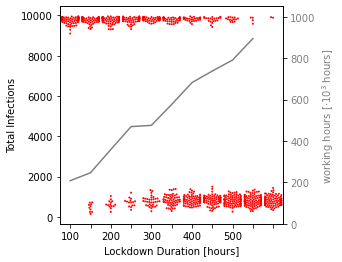

In [25]:
plt.figure(figsize=(4,4))
ax1 = plt.axes()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('Total Infections')  # we already handled the x-label with ax1
sns.swarmplot(data = df_reopen_all[col4], color='r', size=2, ax=ax1)


df_work = pd.read_csv('outputs/work_hours.csv')
ax2.plot(list(range(10)),df_work['Work Hours']/1000, label='working hours', color='gray')
#plt.legend(frameon=False)
ax2.tick_params(axis='y', labelcolor='gray')
ax2.set_ylim(0,1050)
ax2.set_ylabel('working hours [$\cdot 10^3$ hours]', color='gray')
ticks=ax1.get_xticks()
loc_dur = list(df_work['Lockdown Duration'].values)
ax2.set_xticklabels([int(x) if loc_dur.index(x)%2==0 else None for x in loc_dur])
ax1.set_xlabel('Lockdown Duration [hours]')
plt.savefig('inf_working_hours.png',bbox_inches='tight')


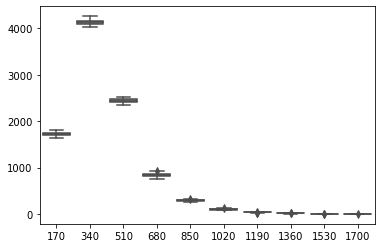

In [406]:
df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur_list[0]  + '.csv')
df_dur.drop('Unnamed: 0',axis=1, inplace=True)
df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
sns.boxplot(data=df_dur, color='gray')#,size=2)

#### herd immunity

In [22]:
random_recovery = [x for  x in filenames if '_rw_0' in x]
df_random_recovery_I = get_df_total_status(random_recovery, server_data_folder,status='I', digits=7)
df_random_recovery_I_1 = get_df_total_status(random_recovery, server_data_folder,status='I', digits=7, time_loc=1)
df_random_recovery_I_2 = get_df_total_status(random_recovery, server_data_folder,status='I', digits=7, time_loc=-1)
df_delta_I_rnd = df_random_recovery_I_2-df_random_recovery_I_1

In [23]:
df_random_recovery_S_1 = get_df_total_status(random_recovery, server_data_folder, status='S', digits=7, time_loc=1)
df_random_recovery_S_2 = get_df_total_status(random_recovery, server_data_folder, status='S', digits=7, time_loc=-1)
df_delta_S = df_random_recovery_S_1-df_random_recovery_S_2

In [38]:
network_recovery = [x for  x in filenames if '_rw_1' in x]
df_network_recovery_I = get_df_total_status(network_recovery,server_data_folder, status='I', digits=7)
df_network_recovery_I_1 = get_df_total_status(network_recovery,server_data_folder, status='I', digits=7, time_loc=1)
df_network_recovery_I_2 = get_df_total_status(network_recovery,server_data_folder, status='I', digits=7, time_loc=-1)
df_delta_I_nw = df_network_recovery_I_2-df_network_recovery_I_1


In [39]:
df_network_recovery_S_1 = get_df_total_status(network_recovery, server_data_folder, status='S', digits=7, time_loc=1)
df_network_recovery_S_2 = get_df_total_status(network_recovery, server_data_folder, status='S', digits=7, time_loc=-1)
df_delta_S_nw = df_network_recovery_S_1-df_network_recovery_S_2

In [40]:
df_network_recovery_R_0 = get_df_total_status(network_recovery, server_data_folder, status='R', digits=7, time_loc=1)
df_random_recovery_R_0 = get_df_total_status(random_recovery, server_data_folder, status='R', digits=7, time_loc=1)
#df_delta_S_nw = df_network_recovery_S_1-df_network_recovery_S_2

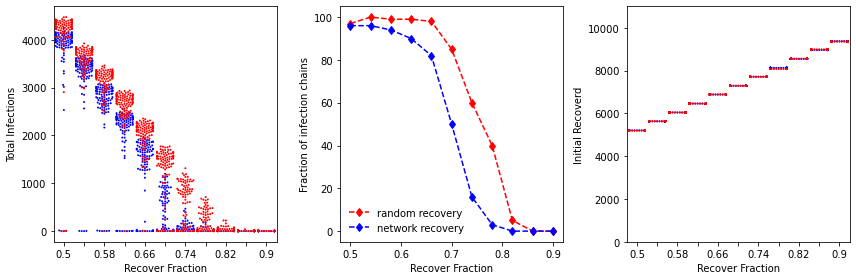

In [37]:
col = list(df_delta_S.keys())
col.sort()
fig, axes = plt.subplots(1,3,figsize=(12,4))

ax1= axes[0]
ax2= axes[1]
ax3= axes[2]
sns.swarmplot(data = df_delta_I_nw[col], color='blue', size=2, ax=ax1, label= 'nework_recovery')
sns.swarmplot(data = df_delta_I_rnd[col], color='red', size=2, ax=ax1, label= 'random_recovery')
ax1.set_ylabel('Total Infections')
ax1.set_xlabel('Recover Fraction')
ax1.set_xticklabels([x if col.index(x)%2==0 else None for x in col])
#ax.get_legend(labels=['nework_recovery']+['_']*len(col))
#ax1.legend(labels=['nework_recovery']+['_a']*len(col)+['random_recovery']+['_a']*len(col), markerscale=3, frameon=False)


###########
cutoff=100
df_nw_I_new=df_delta_I_nw[df_delta_I_nw>cutoff]
df_nw = df_nw_I_new.count().sort_index()
df_rnd_I_new=df_delta_I_rnd[df_delta_I_rnd>cutoff]
df_rnd=df_rnd_I_new.count().sort_index()
## plot

ax2.plot(df_rnd ,'--d', label='random recovery', color='red')
ax2.plot(df_nw ,'--d', label='network recovery', color='blue')
ax2.set_ylabel('Fraction of infection chains')
ax2.set_xlabel('Recover Fraction')
ax2.legend(markerscale=1, frameon=False)
#######


sns.swarmplot(data = df_network_recovery_R_0[col], color='blue', size=2, ax=ax3, label= 'nework_recovery')
sns.swarmplot(data = df_random_recovery_R_0[col], color='red', size=2, ax=ax3, label= 'random_recovery')
ax3.set_xticklabels([x if col.index(x)%2==0 else None for x in col])
ax3.set_ylabel('Initial Recoverd')
ax3.set_xlabel('Recover Fraction')
ax3.set_ylim(0,11000)

plt.tight_layout()
plt.savefig('plots/recover_frac.png')

In [76]:
os.listdir(folder+ network_recovery[0]+'/')
pd.read_csv(folder+ network_recovery[0]+'/' + 'sim_parameters.csv')

,run,0
0,max_time,3000
1,start_2,200
2,start_3,500
3,closed_locs,[]
4,reopen_locs,[]
5,infectivity,0.3
6,name,no_mitigation_IF03
7,scenario_type,13
8,cores,45
9,number,100


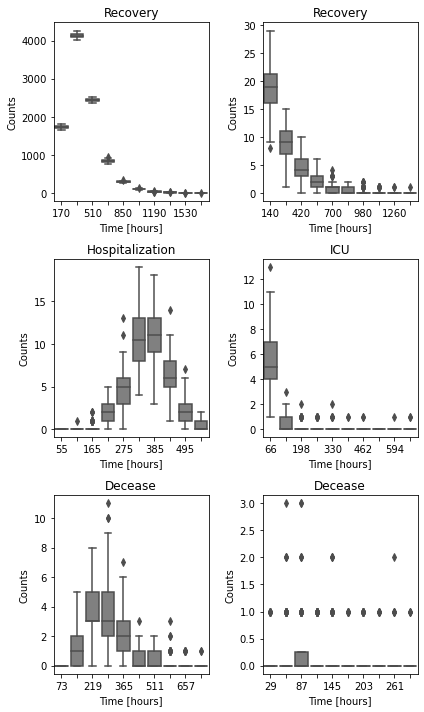

In [427]:
dur_list = ['infection_to_recovery', 'infection_to_hospital', 'infection_to_death', 'hospital_to_recovery', 'hospital_to_icu', 'hospital_to_death']
dur_titels = ['Recovery', 'Hospitalization', 'Decease', 'Recovery', 'ICU', 'Decease']

dur_dict = dict(zip(dur_list, dur_titels))
fig, axes = plt.subplots(3,2, figsize=(6,10))

plt.subplots
for k,dur in enumerate(dur_list):
    col = k%3
    row = int(k/3)
    ax=axes[col][row]
    df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur + '.csv')
    df_dur.drop('Unnamed: 0',axis=1, inplace=True)
    df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
    sns.boxplot(data=df_dur, color='gray',ax=ax)#size=2,
    ax.set_xticklabels([x if list(df_dur.columns).index(x)%2==0 else None for x in df_dur.columns])
    ax.set_xlabel('Time [hours]')
    ax.set_ylabel('Counts')
    ax.set_title(dur_dict[dur])
    
plt.tight_layout()
plt.savefig('../fig2/durations.svg')

no_mitigation_infectivity_0.300


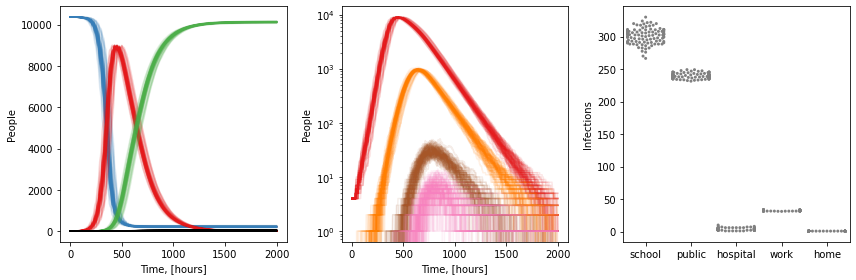

In [418]:
print(folders[1])

folder1 = 'no_mitigation_IF_030'
flags = ['IsInfected','Hospitalized','Diagnosed','ICUed']

fig, axes = plt.subplots(1,3, figsize=(12,4))
ax=axes[0]
plot_stat_para(ax, folders[1])
ax=axes[1]
plot_stat_para(ax, folders[1],statii=flags, log=True)

ax=axes[2]
df_loc_stat = pd.read_csv('server_data/outputs/'+folder1+'/'+folder1+'_infections_per_location_type.csv')
df_loc_stat.drop('Unnamed: 0',axis=1, inplace=True)
sns.swarmplot(data=df_loc_stat, color='gray', ax=ax, size=3)
ax.set_ylabel('Infections')
plt.tight_layout()

plt.savefig('../fig2/fig2_stats.svg')
#df_stat = pd.read_csv('server_data/outputs/'+folders[1]+'/'+folders[1]+'_'+flags[0]+'.csv')
#df_stat.drop('time',axis=1,inplace=True)
#df_stat.plot(ax=axes[1],c=statusAndFlagsColors[flags[0]],legend=False)

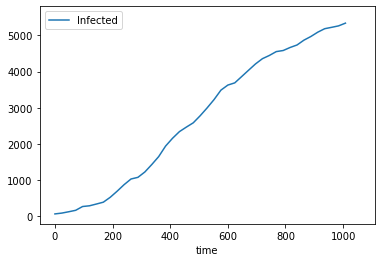

In [4]:
import pandas as pd 
df_data = pd.read_csv('COVID_Daily.csv')

df_data.reset_index(inplace=True)
df_data['time']=df_data['index']*24
df_data.plot(x='time',y='Infected')

In [6]:
def plot_stat_para_mean_ci(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
            ax.plot(df_stat)df_stat.std(axis=1)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.05)

SyntaxError: invalid syntax (<ipython-input-6-0dd2e242fd3b>, line 9)

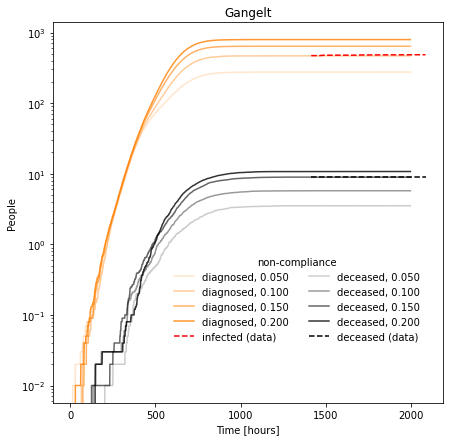

In [9]:
file = 'close_all_IF03_disobedience_0.100'
files = ['close_all_IF03_disobedience_0.050','close_all_IF03_disobedience_0.100','close_all_IF03_disobedience_0.150', 'close_all_IF03_disobedience_0.200']

df_data = pd.read_csv('COVID_Daily_gangelt.csv')
df_data.reset_index(inplace=True)
df_data['Time']=(df_data['time']+59)*24

fig, axes = plt.subplots(1,1, figsize=(7,7), sharey=True, sharex=True)

for k,file in enumerate(files):
    plot_stat_para_mean(axes,file, statii=['cumulativ_WasDiagnosed'], alpha=0.2*(k+1), label = 'diagnosed, '+file[-5:])
axes.plot(df_data['Time'], df_data['Infected'],'r--', label ='infected (data)')

for k,file in enumerate(files):
    plot_stat_para_mean(axes,file, statii=['D'], alpha=0.2*(k+1), label = 'deceased, '+file[-5:])

axes.plot(df_data['Time'], df_data['Dead'],'k--', label = 'deceased (data)')

#df_data.plot(x='time',y=['Infected'], ax=axes, logy=True, color='r')
#df_data.plot(x='time',y=['Dead'], ax=axes, logy=True, color='k')


axes.set_yscale('log')
axes.set_title('Gangelt')
axes.legend(loc=(0.3,0.15), frameon=False, ncol=2, title='non-compliance')
#plt.savefig('Gangelt_data.svg')



In [34]:
df_data

,index,Date,Infected,Recovered,Dead,Sick,time,Time
0,0,24.04.20,471,407,9,55.0,0,1416
1,1,25.04.20,471,407,9,55.0,1,1440
2,2,26.04.20,471,407,9,55.0,2,1464
3,3,27.04.20,477,427,9,41.0,3,1488
4,4,28.04.20,477,438,9,30.0,4,1512
5,5,29.04.20,477,438,9,30.0,5,1536
6,6,30.04.20,478,446,9,23.0,6,1560
7,7,01.05.20,478,446,9,23.0,7,1584
8,8,02.05.20,478,446,9,23.0,8,1608
9,9,03.05.20,478,446,9,23.0,9,1632


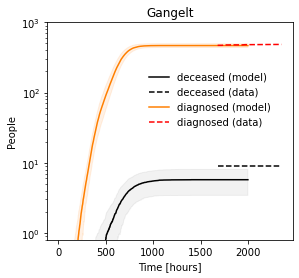

In [14]:
fig, ax = plt.subplots(1,1, figsize=(4.4,4), sharey=True, sharex=True)


folder_scenario = 'close_all_IF03_disobedience_0.100'
df_data = pd.read_csv('COVID_Daily_gangelt.csv')

stat = 'D'
df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
df_stat.drop('time',axis=1,inplace=True)
df_stat.mean(axis=1).plot(alpha=1, c=statusAndFlagsColors[stat], ax=ax, label='deceased (model)')

std = df_stat.std(axis=1).values
mean = df_stat.mean(axis=1).values
df_data['Time']=(df_data['time']+70)*24
ax.fill_between(df_stat.index.values, (mean-std), (mean+std), color='gray', alpha=.1)
ax.plot(df_data['Time'], df_data['Dead'],'k--', label = 'deceased (data)')

###########

stat = 'cumulativ_WasDiagnosed'
df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat +'.csv')
df_stat.drop('time',axis=1,inplace=True)
df_stat.mean(axis=1).plot(alpha=1, c=statusAndFlagsColors[stat[10:]], ax=ax, label='diagnosed (model)')

std = df_stat.std(axis=1).values
mean = df_stat.mean(axis=1).values
df_stat['Time']=(df_data['time']+70)*24
ax.fill_between(df_stat.index.values, (mean-std), (mean+std), color=statusAndFlagsColors[stat[10:]], alpha=.1)
ax.plot(df_data['Time'], df_data['Infected'],'r--', label ='diagnosed (data)')

ax.set_yscale('log')
ax.set_title('Gangelt')
ax.legend(loc=(0.4,0.50), frameon=False)
ax.set_ylabel('People')
ax.set_xlabel('Time [hours]')
ax.set_ylim(0.8,1000)
plt.savefig('Gangelt_data_non_c01.svg')




In [247]:
df_stat[df_stat['WasDiagnosed']>7]

,time,IsInfected,Diagnosed,Hospitalized,ICUed,WasInfected,WasDiagnosed,WasHospitalized,WasICUed
293,293,1374,8,0,0,1419,8,0,0
294,294,1384,8,0,0,1430,8,0,0
295,295,1389,9,0,0,1436,9,0,0
296,296,1391,9,0,0,1439,9,0,0
297,297,1396,9,0,0,1444,9,0,0
...,...,...,...,...,...,...,...,...,...
1995,1995,2,1,0,1,7226,1251,51,0
1996,1996,2,1,0,1,7226,1251,51,0
1997,1997,2,1,0,1,7226,1251,51,0
1998,1998,2,1,0,1,7226,1251,51,0


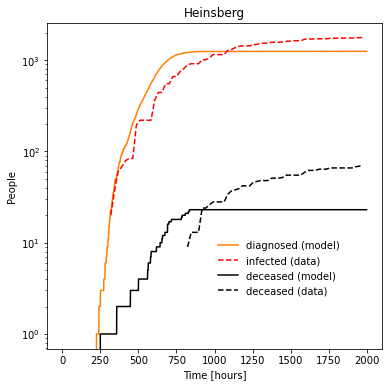

In [251]:
df_stat = pd.read_csv('server_data/heinsberg/HeinsbergFlags.csv')
df_stat_D = pd.read_csv('server_data/heinsberg/HeinsbergDs.csv')
df_data = pd.read_csv('COVID_Daily_heinsberg.csv')
df_data.reset_index(inplace=True)
df_data['Time']=(df_data.index.values+1)*24+295

fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True, sharex=True)

df_stat.plot(y='WasDiagnosed', color=statusAndFlagsColors['WasDiagnosed'],
             label='diagnosed (model)', ax =ax)
#df_data.plot(x='Time', y='Infected', ax=ax, c='--r', label='infected (data)')
ax.plot(df_data['Time'],df_data['Infected'], '--r',label='infected (data)')

ax.set_yscale('log')

df_stat_D.plot(y='D', color=statusAndFlagsColors['D'],
             label='deceased (model)', ax =ax)
#df_data.plot(x='Time', y='Dead', ax=ax, c='--k', label='deceased (data)')
ax.plot(df_data['Time'],df_data['Dead'], '--k',label='deceased (data)')
ax.set_yscale('log')
ax.set_title('Heinsberg')
ax.legend(loc=(0.5,0.15), frameon=False)
ax.set_ylabel('People')
ax.set_xlabel('Time [hours]')
plt.savefig('Heinsberg_data_non_c01.svg')

In [218]:
df_data

,index,Date,Infected,Recovered,Dead,Sick,Time
0,0,27.02.20,20.0,NaN,NaN,20,1416
1,1,28.02.20,37.0,NaN,NaN,37,1440
2,2,29.02.20,60.0,NaN,NaN,60,1464
3,3,01.03.20,68.0,NaN,NaN,68,1488
4,4,02.03.20,79.0,NaN,NaN,79,1512
...,...,...,...,...,...,...,...
168,168,NaN,NaN,NaN,NaN,0,5448
169,169,NaN,NaN,NaN,NaN,0,5472
170,170,NaN,NaN,NaN,NaN,0,5496
171,171,NaN,NaN,NaN,NaN,0,5520


NameError: name 'x' is not defined

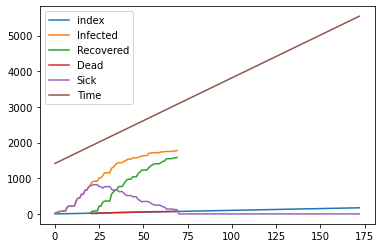

In [213]:
df_data.plot()


ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

### plot ratios changes for schedules and locations

In [220]:
def get_ratio_df(df_data, df_world, relative=True):
    ### data processing
    df_world_m = df_world.mean()
    df_data_m = df_data.mean()
    df_series = df_data_m-df_world_m
    if relative:
        df_series = df_series/df_world_m
    else:
        pass
    df = df_series.to_frame('values')
    df['positive'] = df>0
    df.sort_index(inplace=True)
    return df

In [221]:
def plot_ratio_change(df, cmap_= 'Set1',
                      ax=None,
                      label_offset= 0.09,
                      title = 'Title',
                      save_fig=True,
                      output_folder='plots/',
                      ):
    """
    plot the change between two input Dataframes as bar plot without grid 
    :return: axes of plot
    """
    ###figure
    cmap = plt.get_cmap(cmap_)
    colors = cmap(np.arange(0,3))
    if not ax:
        fig,ax = plt.subplots(1,1, figsize=(5,4))
    ##plot
    df['values'].plot(kind='bar', color=df['positive'].map({True: colors[0], False: colors[1]}),ax=ax)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x',direction='out', pad=100, labelrotation=90)
    #ax.set_yticks([])
    ax.set_ylim(df['values'].min() * 1.4-0.1,df['values'].max() * 1.5+0.1)
    ax.xaxis.set_ticks_position('none') 
    ax.set_title(title,pad=30)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x(), p.get_height() * 1.02 + label_offset))
        else:
            ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x(), p.get_height() * 1.02 - label_offset*2))

    if save_fig:
        plt.savefig(output_folder + 'contribution_per_schedule_type.png', bbox_inches='tight')
    return ax   